In [67]:
import AYD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import statsmodels.api as sm
import seaborn as sns

### conexiones
import sys
sys.path.insert(0, "/home/jupyter")

%time
import ciphered_connections as connections
import getpass
from datetime import datetime

# path = getpass.getpass("PATH: ")
# key = getpass.getpass("KEY:  ")
# iv = getpass.getpass("IV:   ")

path = "/home/jupyter/ciphered_connections/000543781.dta"
key = "50bb801fa81378a538654b2b7076b223"
iv = "9029080389AF47F5"


# path: /home/jupyter/ciphered_connections/000543781.dta  
# key: 50bb801fa81378a538654b2b7076b223
# iv: 9029080389AF47F5

%time

conexion_bq = connections.BigQueryConnection(
    path_token = path, key = key, 
    iv = iv)
datetime_str = datetime.now().strftime("%Y%m%d%H%M%S")
table = "DATAMART.gcs_tabla_tiger_{0}".format(datetime_str)
bucket_object = "gcs_file_tiger_{0}_*.csv".format(datetime_str)
bucket_name = 'nbamasmovil'

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 62 µs
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 33.9 µs


In [132]:
# IMPORTACIÓN DE DATOS
# ============================================================
query_decil = '''
     SELECT *                                  
     
     #FROM `bi-data-science-pilots.DESARROLLO.Segemtacion_1P_202006_PRE4` 
     #FROM `bi-data-science-pilots.DESARROLLO.Segemtacion_1P_202006_ALL_DECIL` 
     # FROM `bi-data-science-pilots.DESARROLLO.000_ajuste_13` 
     
    FROM `bi-data-science-pilots.DESARROLLO.000_ajuste_18_202008_new_4_add` 
   
         '''
# where Decil < 3
#Segemtacion_1P_202006_v2_PY`
#TABLON_decil_03 = conexion_bq.download_table_bq_gcs(query_decil,
TABLON_decil_ajuste_1 = conexion_bq.download_table_bq_gcs(query_decil,
     tabla_tmp = table, bucket_name = bucket_name,
     tmp_object = bucket_object)

#TABLON_decil_03
TABLON_decil_ajuste_1

Query results loaded to table /projects/bi-data-science-pilots/datasets/DATAMART/tables/gcs_tabla_tiger_20201125094714
Exported DATAMART.gcs_tabla_tiger_20201125094714 to gs://nbamasmovil/gcs_file_tiger_20201125094714_*.csv
Ejecutando la query:
 drop table `bi-data-science-pilots.DATAMART.gcs_tabla_tiger_20201125094714` ...

Query ejecutada correctamente


,YEAR,MONTH,EOP,BRAND_DS,CUSTOMER_ID,MIN_SERV_ACTIVATION_DATE,MAX_SERV_DEACTIVATION_DATE,NUM_ACCS_TOTA,NUM_ACCS_ACTI,NUM_ACCS_DEAC,...,SEG_Heavy_Callers,SEG_Wrong_Tariff,SEG_Competitors,SEGMENTO_CHURN_1P,IS_CUST_DEPO,AVG_SAVINGS,MAX_SAVINGS,MAX_PERC_SAVINGS,AVG_PERC_SAVINGS,NUM_TARIFF_PROP
0,2020,8,202008,YOIGO,2189207,2010-08-05,NaN,0,0,0,...,0,0,0,SIN ASIGNAR,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,8,202008,YOIGO,9129172,2020-06-10,NaN,0,0,0,...,0,0,0,SIN ASIGNAR,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,8,202008,YOIGO,8644456,2019-01-17,NaN,0,0,0,...,0,0,0,SIN ASIGNAR,1.0,3.58,5.79,26.94,16.67,3.0
3,2020,8,202008,YOIGO,9044716,2020-01-23,NaN,0,0,0,...,0,0,0,SIN ASIGNAR,1.0,4.13,7.44,18.75,10.41,5.0
4,2020,8,202008,YOIGO,8710813,2019-03-14,NaN,0,0,0,...,0,0,1,6_COMPETITORS,1.0,0.82,0.82,3.68,3.68,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64019,2020,8,202008,YOIGO,365454,2008-01-28,2019-08-12,13,0,0,...,0,1,1,4_WRONG TARIFF,1.0,6.76,14.05,30.91,14.88,26.0
64020,2020,8,202008,YOIGO,772946,2008-12-22,2020-03-05,12,0,0,...,1,1,1,4_WRONG TARIFF,1.0,10.71,22.31,33.75,16.20,53.0
64021,2020,8,202008,YOIGO,14245,2006-12-09,2018-04-20,21,0,0,...,1,0,1,1_PROCESS ISSUE,1.0,3.30,5.78,17.93,10.23,2.0
64022,2020,8,202008,YOIGO,2358015,2010-09-28,2020-07-10,14,1,1,...,1,1,1,1_PROCESS ISSUE,1.0,15.28,31.32,38.71,18.88,60.0


In [101]:
# Buscador de variables
# ========================================
def verificar(df,var):
    variables_TOTAL=pd.DataFrame(list(df.columns.values)) 
    variables_TOTAL[['Variables']]=variables_TOTAL[[0]]
    validar=list(variables_TOTAL[variables_TOTAL['Variables'].str.contains(var,case=False)]['Variables']) 
    return validar



In [146]:
verificar(TABLON_decil_ajuste_1,"mobile")  



['MOBILE_INCIDENCES',
 'DELTA_MOBILE_INCIDENCES_3M_MONTH',
 'DELTA_MOBILE_INCIDENCES_6M_MONTH',
 'Mobile_Red_Incidences']

In [133]:
df=TABLON_decil_ajuste_1.copy()

In [134]:
# Depuración de datos
# ============================================================

# Eliminamos Constantes
# ============================================================
cadena=AYD.DS.DSC_Factor(df)
cadena_constantes = cadena[cadena.unique==1]           
eliminar_constantes=list(cadena_constantes['Variables'])

# Se añade a la lista variables de consentimiento
# ========================================
eliminar_constantes.extend(['CUSTOMER_ID'] ) # WORK TYPE, tenemos que recodificar bien

# # Exlcuimos todas las variables que contienen las palabras de Bus o Soho (sin considerar diferencia entres mayusculas y minusculas)
# # ========================================
numericas=AYD.DS.DSC(df)
#eliminar=list(numericas[numericas['Variables'].str.contains("BUSI|SOHO|FIX|GDPR|FTTH|ADSL|2P|FMC|PRE|FECHA|DATE|DT" ,case=False)]['Variables']) 
eliminar=list(numericas[numericas['Variables'].str.contains("BUSI|SOHO|FIX|GDPR|FTTH|ADSL|2P|FMC|PRE|FECHA|DATE" ,case=False)]['Variables']) 
eliminar.extend(['EOP','GDPR_NEVER_CALL','MONTH','Propension','YEAR','Percentil','VERSION','Decil'])  # variables gdpr 
eliminar_constantes.extend(eliminar)

# Se eliminan las varibales seleccionadas
# ========================================
df.drop(eliminar_constantes, axis = 'columns',inplace=True) 
df

,NUM_ACCS_TOTA,NUM_ACCS_ACTI,NUM_ACCS_DEAC,NUM_ACCS_CURR,NUM_BRAND_YOIGO_TOTA,NUM_BRAND_YOIGO_ACTI,NUM_BRAND_YOIGO_DEAC,NUM_BRAND_YOIGO_CURR,IS_CUST_BRAND_YOIGO_CURR,NUM_BRAND_MASMOVIL_TOTA,...,SEG_Heavy_Callers,SEG_Wrong_Tariff,SEG_Competitors,SEGMENTO_CHURN_1P,IS_CUST_DEPO,AVG_SAVINGS,MAX_SAVINGS,MAX_PERC_SAVINGS,AVG_PERC_SAVINGS,NUM_TARIFF_PROP
0,0,0,0,1,0,0,0,1,True,0,...,0,0,0,SIN ASIGNAR,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,0,1,0,0,0,1,True,0,...,0,0,0,SIN ASIGNAR,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,0,1,0,0,0,1,True,0,...,0,0,0,SIN ASIGNAR,1.0,3.58,5.79,26.94,16.67,3.0
3,0,0,0,1,0,0,0,2,True,0,...,0,0,0,SIN ASIGNAR,1.0,4.13,7.44,18.75,10.41,5.0
4,0,0,0,1,0,0,0,1,True,0,...,0,0,1,6_COMPETITORS,1.0,0.82,0.82,3.68,3.68,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64019,13,0,0,1,17,0,0,3,True,0,...,0,1,1,4_WRONG TARIFF,1.0,6.76,14.05,30.91,14.88,26.0
64020,12,0,0,1,20,0,0,4,True,0,...,1,1,1,4_WRONG TARIFF,1.0,10.71,22.31,33.75,16.20,53.0
64021,21,0,0,1,21,0,0,1,True,0,...,1,0,1,1_PROCESS ISSUE,1.0,3.30,5.78,17.93,10.23,2.0
64022,14,1,1,2,21,0,0,5,True,0,...,1,1,1,1_PROCESS ISSUE,1.0,15.28,31.32,38.71,18.88,60.0


In [135]:
## Univariante Discretas

In [147]:
 pd.__version__

'1.0.3'

In [136]:
df = df.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' else x.fillna('.'))  
df

,NUM_ACCS_TOTA,NUM_ACCS_ACTI,NUM_ACCS_DEAC,NUM_ACCS_CURR,NUM_BRAND_YOIGO_TOTA,NUM_BRAND_YOIGO_ACTI,NUM_BRAND_YOIGO_DEAC,NUM_BRAND_YOIGO_CURR,IS_CUST_BRAND_YOIGO_CURR,NUM_BRAND_MASMOVIL_TOTA,...,SEG_Heavy_Callers,SEG_Wrong_Tariff,SEG_Competitors,SEGMENTO_CHURN_1P,IS_CUST_DEPO,AVG_SAVINGS,MAX_SAVINGS,MAX_PERC_SAVINGS,AVG_PERC_SAVINGS,NUM_TARIFF_PROP
0,0,0,0,1,0,0,0,1,True,0,...,0,0,0,SIN ASIGNAR,0.0,0.00,0.00,0.00,0.00,0.0
1,0,0,0,1,0,0,0,1,True,0,...,0,0,0,SIN ASIGNAR,0.0,0.00,0.00,0.00,0.00,0.0
2,0,0,0,1,0,0,0,1,True,0,...,0,0,0,SIN ASIGNAR,1.0,3.58,5.79,26.94,16.67,3.0
3,0,0,0,1,0,0,0,2,True,0,...,0,0,0,SIN ASIGNAR,1.0,4.13,7.44,18.75,10.41,5.0
4,0,0,0,1,0,0,0,1,True,0,...,0,0,1,6_COMPETITORS,1.0,0.82,0.82,3.68,3.68,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64019,13,0,0,1,17,0,0,3,True,0,...,0,1,1,4_WRONG TARIFF,1.0,6.76,14.05,30.91,14.88,26.0
64020,12,0,0,1,20,0,0,4,True,0,...,1,1,1,4_WRONG TARIFF,1.0,10.71,22.31,33.75,16.20,53.0
64021,21,0,0,1,21,0,0,1,True,0,...,1,0,1,1_PROCESS ISSUE,1.0,3.30,5.78,17.93,10.23,2.0
64022,14,1,1,2,21,0,0,5,True,0,...,1,1,1,1_PROCESS ISSUE,1.0,15.28,31.32,38.71,18.88,60.0


In [137]:
df['IS_CUST_DEPO'].unique

<bound method Series.unique of 0        0.0
1        0.0
2        1.0
3        1.0
4        1.0
        ... 
64019    1.0
64020    1.0
64021    1.0
64022    1.0
64023    0.0
Name: IS_CUST_DEPO, Length: 830890, dtype: float64>

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [127]:
def univar_original(df,var,Exclude_CERO,cli_hoja):    
    print('    '+var+' VS target')
    if len(df[var].unique()) <= 10:
        print('*   Tipo de variable: Numérica con menos de 10 categorías')                 
        if Exclude_CERO=='TRUE':
            print('*   LA CATEGORÍA '+var +' = 0 ES EXCLUIDA')               
           
            df_f=df[df[var]>0]
            Freq_VS_target=pd.DataFrame(pd.value_counts(df_f[var]))
            Freq_VS_target = Freq_VS_target.rename(columns = {var:'Total_Clientes'})
            Freq_VS_target.reset_index(inplace=True) 
            Freq_VS_target = Freq_VS_target.rename(columns = {'index':var})
            temp =pd.DataFrame(pd.value_counts(df_f[var]) /len(df_f[var])*100).reset_index()
            Freq_VS_target['%_clientes']=pd.DataFrame(temp[[var]])            
            temp=pd.DataFrame(df_f.groupby([var])['fuga_real'].sum()).reset_index()
            Freq_VS_target['Total_Fugas']=pd.DataFrame(temp[['fuga_real']])
            temp=pd.DataFrame(Freq_VS_target['Total_Fugas']/sum(df_f['fuga_real'])*100).reset_index()
            Freq_VS_target['%_fugas']=pd.DataFrame(temp[['Total_Fugas']])
            temp=pd.DataFrame((Freq_VS_target['Total_Fugas']/sum(Freq_VS_target['Total_Clientes']) )*100).reset_index()
            Freq_VS_target['%_fugas_vs_Clie']=pd.DataFrame(temp[['Total_Fugas']])
            Freq_VS_target = Freq_VS_target.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' else x.fillna('.'))   
            Freq_VS_target=Freq_VS_target.sort_values(by=var, ascending=True, na_position='first') # se ordena variable

            # gráfico
            #Freq_VS_target_plot=Freq_VS_target[Freq_VS_target[var]<10]
            sns.set(style="white", rc={"lines.linewidth": 3})
            fig, ax1 = plt.subplots(figsize=(6,2))
            ax2 = ax1.twinx()
            sns.barplot(x=Freq_VS_target[var].astype(str).tolist(),
                        y=Freq_VS_target["Total_Clientes"].tolist(), 
                        color='#004488',
                        ax=ax1)
            sns.lineplot(x=Freq_VS_target[var].astype(str).tolist(), 
                         y=Freq_VS_target["%_fugas_vs_Clie"].tolist(),
            color='r',
            marker="o",
            ax=ax2)
            plt.show()
            sns.set()
            # fin de grafico
            return Freq_VS_target

            
        else: 
            print('*   SE MANTIENE TODAS LAS CATEGORIAS')
            print('*   Tipo de variable: Numérica con menos de 10 categorías')    
            Freq_VS_target=pd.DataFrame(pd.value_counts(df[var]))
            Freq_VS_target = Freq_VS_target.rename(columns = {var:'Total_Clientes'})
            Freq_VS_target.reset_index(inplace=True) 
            Freq_VS_target = Freq_VS_target.rename(columns = {'index':var})
            Freq_VS_target['%_clientes']=pd.DataFrame(pd.value_counts(df[var]) /len(df[var])*100)
            Freq_VS_target['Total_Fugas']=pd.DataFrame(df.groupby([var])['fuga_real'].sum())
            Freq_VS_target['%_fugas']=pd.DataFrame(Freq_VS_target['Total_Fugas'])/sum(df['fuga_real'])*100
            Freq_VS_target['%_fugas_vs_Clie']=pd.DataFrame(Freq_VS_target['Total_Fugas']/Freq_VS_target['Total_Clientes'])*100

            Freq_VS_target = Freq_VS_target.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' else x.fillna('.'))
            Freq_VS_target=Freq_VS_target.sort_values(by=var, ascending=True, na_position='first') # se ordena variable

            # gráfico
            Freq_VS_target_plot=Freq_VS_target[Freq_VS_target[var]<10]
            sns.set(style="white", rc={"lines.linewidth": 3})
            fig, ax1 = plt.subplots(figsize=(6,2))
            ax2 = ax1.twinx()
            sns.barplot(x=Freq_VS_target_plot[var].astype(str).tolist(),
                        y=Freq_VS_target_plot["Total_Clientes"].tolist(), 
                        color='#004488',
                        ax=ax1)
            sns.lineplot(x=Freq_VS_target_plot[var].astype(str).tolist(), 
                         y=Freq_VS_target_plot["%_fugas_vs_Clie"].tolist(),
            color='r',
            marker="o",
            ax=ax2)
            plt.show()
            sns.set()
            # fin de gráfico     
            
          
            sns.set()
    
            return Freq_VS_target
    else:        
        print('*   Tipo de variable:  Numérica con MÁS de 10 categorías, su discretización es la siguiente')
        ###-----------------Reubicar
        # from sklearn.model_selection import train_test_split
        # from sklearn.tree import DecisionTreeClassifier

#         # Imputacion a ceo
#         # ========================================
#         df = df.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' else x.fillna('.')) 

#         # train_test_split
#         # ========================================
#         X_train, X_test, y_train, y_test = train_test_split(df[[var, 'fuga_real']],df.fuga_real , test_size = 0.3)

#         # Entrenamieno de arbol
#         # ========================================
#         tree_model = DecisionTreeClassifier(max_depth=2)
#         tree_model.fit(X_train[[var]], X_train.fuga_real)
        
#         ###-----------------fin de Reubicar

#         df[var+'_tree']=tree_model.predict_proba(df[var].to_frame())[:,1]

#         # Intevalos Variable
#         # ========================================
#         inf=pd.DataFrame(df.groupby([var+'_tree'])[var].min()) # lo uso para iniciar el dataframe
#         Freq=pd.DataFrame(inf)
#         Freq['lim_inferior']=pd.DataFrame(df.groupby([var+'_tree'])[var].min())
#         Freq['lim_superior']=pd.DataFrame(df.groupby([var+'_tree'])[var].max())
#         # SE INICA PASO PARA GENERACION DE VARIABLE INTERVALO
#         # Elimino decimales antes de pasar a string
#         Freq["lim_inferior"] = Freq["lim_inferior"].astype(int)
#         Freq["lim_superior"] = Freq["lim_superior"].astype(int) 
#         # Lo paso a string
#         Freq['lim_inferior']=Freq['lim_inferior'].astype(str)
#         Freq['lim_superior']=Freq['lim_superior'].astype(str)
#         Freq['INTERVALO'] = Freq["lim_inferior"] + "-" + Freq["lim_superior"]   
#         # FIN DE PASO PARA GENERACION DE VARIABLE INTERVALO

        # Imputacion a ceo
        # ========================================
        df = df.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' else x.fillna('.')) 

        # train_test_split
        # ========================================
        X_train, X_test, y_train, y_test = train_test_split(df[[var, 'fuga_real']],df.fuga_real , test_size = 0.3)

        # Entrenamieno de arbol
        # ========================================
        tree_model = DecisionTreeClassifier(max_depth=3,min_samples_leaf=cli_hoja) 
        tree_model.fit(X_train[[var]], X_train.fuga_real)

        df[var+'_tree']=tree_model.predict_proba(df[var].to_frame())[:,1]        

        # Intevalos Variable
        # ========================================
        inf=pd.DataFrame(df.groupby([var+'_tree'])[var].min()) # lo uso para iniciar el dataframe
        Freq=pd.DataFrame(inf)
        Freq['lim_inferior']=pd.DataFrame(df.groupby([var+'_tree'])[var].min())
        Freq['lim_superior']=pd.DataFrame(df.groupby([var+'_tree'])[var].max())
        Freq=Freq.sort_values(by='lim_inferior', ascending=True, na_position='first') # se ordena variable

        # SE INICA PASO PARA GENERACION DE VARIABLE INTERVALO
        # Elimino decimales antes de pasar a string
        Freq["lim_inferior"] = Freq["lim_inferior"].astype(float).round(2)
        Freq["lim_superior"] = Freq["lim_superior"].astype(float).round(2) 
        # Lo paso a string
        Freq['lim_inferior']=Freq['lim_inferior'].astype(str)
        Freq['lim_superior']=Freq['lim_superior'].astype(str)
        Freq['INTERVALO'] = Freq["lim_inferior"] + "-" + Freq["lim_superior"]   
        # FIN DE PASO PARA GENERACION DE VARIABLE INTERVALO
        # SE ELIMINA VARIABLES SOBRANTES
        Freq.drop(['lim_inferior','lim_superior',var], axis = 'columns',inplace=True) 
        Freq['Total_Clientes']=pd.DataFrame(df.groupby([var+'_tree'])['fuga_real'].count())
        Freq['%_clientes']=pd.DataFrame(Freq['Total_Clientes'])/len(df[var])*100
        Freq['Total_Fugas']=pd.DataFrame(df.groupby([var+'_tree'])['fuga_real'].sum())
        Freq['%_fugas']=pd.DataFrame(Freq['Total_Fugas'])/sum(df['fuga_real'])*100
        Freq['%_fugas_vs_Clie']=pd.DataFrame((Freq['Total_Fugas'])/Freq['Total_Clientes'])*100
        Freq=Freq.reset_index(drop=True) # regenero indice
        

        
        # gráfico
        #Freq_VS_target_plot=Freq[Freq[var]<10]
#         Freq_VS_target_plot=Freq
#         sns.set(style="white", rc={"lines.linewidth": 3})
#         fig, ax1 = plt.subplots(figsize=(6,2))
#         ax2 = ax1.twinx()
#         sns.barplot(x=Freq_VS_target_plot['INTERVALO'].astype(str).tolist(),
#                     y=Freq_VS_target_plot["Total_Clientes"].tolist(), 
#                     color='#004488',
#                     ax=ax1)
#         sns.lineplot(x=Freq_VS_target_plot['INTERVALO'].astype(str).tolist(), 
#                      y=Freq_VS_target_plot["%_fugas_vs_Clie"].tolist(),
#         color='r',
#         marker="o",
#         ax=ax2)
#         plt.show()
#         sns.set()
        #Freq_VS_target_plot=Freq[Freq['var']<10]
        Freq_VS_target_plot=Freq
        sns.set(style="white", rc={"lines.linewidth": 3})
        fig, ax1 = plt.subplots(figsize=(15,2))
        ax2 = ax1.twinx()
        sns.barplot(x=Freq_VS_target_plot['INTERVALO'].astype(str).tolist(),
                    y=Freq_VS_target_plot["Total_Clientes"].tolist(), 
                    color='#004488',
                    ax=ax1)
        sns.lineplot(x=Freq_VS_target_plot['INTERVALO'].astype(str).tolist(), 
                     y=Freq_VS_target_plot["%_fugas_vs_Clie"].tolist(),
        color='r',
        marker="o",
        ax=ax2)
        plt.show()
        sns.set()
        # fin de gráfico
    return Freq

In [128]:
# TICKETS_NETWORK, AVG_KPI_PERC_CSS_MOBI, AVG_KPI_PERC_CDR_MOBI, NUM_MONTH_BAD_THR_QOE_MOBI_6M, IS_DETERIORED_1M_AVG_THR_QOE_MOBI

In [129]:
TABLON_decil_ajuste_1

,YEAR,MONTH,EOP,BRAND_DS,CUSTOMER_ID,MIN_SERV_ACTIVATION_DATE,MAX_SERV_DEACTIVATION_DATE,NUM_ACCS_TOTA,NUM_ACCS_ACTI,NUM_ACCS_DEAC,...,SEG_Heavy_Callers,SEG_Wrong_Tariff,SEG_Competitors,SEGMENTO_CHURN_1P,IS_CUST_DEPO,AVG_SAVINGS,MAX_SAVINGS,MAX_PERC_SAVINGS,AVG_PERC_SAVINGS,NUM_TARIFF_PROP
0,2020,8,202008,YOIGO,9021637,2020-01-01,NaN,0,0,0,...,0,0,0,SIN ASIGNAR,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,8,202008,YOIGO,6965107,2015-08-29,NaN,0,0,0,...,0,0,0,SIN ASIGNAR,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,8,202008,YOIGO,9114908,2020-05-04,NaN,0,0,0,...,0,0,0,SIN ASIGNAR,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,8,202008,YOIGO,6997371,2015-09-15,NaN,0,0,0,...,0,1,0,4_WRONG TARIFF,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,8,202008,YOIGO,5752350,2013-12-23,NaN,0,0,0,...,0,0,0,SIN ASIGNAR,1.0,2.06,2.06,15.11,15.11,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53668,2020,8,202008,YOIGO,5070629,2013-03-18,2020-08-31,5,0,1,...,1,1,1,1_PROCESS ISSUE,NaN,NaN,NaN,NaN,NaN,NaN
53669,2020,8,202008,YOIGO,4416504,2012-08-13,2019-12-24,4,2,0,...,0,1,1,4_WRONG TARIFF,1.0,33.24,47.11,59.37,41.89,45.0
53670,2020,8,202008,YOIGO,5270510,2013-06-17,2020-07-06,5,1,0,...,0,1,1,4_WRONG TARIFF,1.0,3.86,9.90,18.44,7.19,23.0
53671,2020,8,202008,YOIGO,6280346,2014-09-10,2019-09-12,5,0,0,...,0,1,0,4_WRONG TARIFF,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
df

,NUM_ACCS_TOTA,NUM_ACCS_ACTI,NUM_ACCS_DEAC,NUM_ACCS_CURR,NUM_BRAND_YOIGO_TOTA,NUM_BRAND_YOIGO_ACTI,NUM_BRAND_YOIGO_DEAC,NUM_BRAND_YOIGO_CURR,IS_CUST_BRAND_YOIGO_CURR,NUM_BRAND_MASMOVIL_TOTA,...,SEG_Heavy_Callers,SEG_Wrong_Tariff,SEG_Competitors,SEGMENTO_CHURN_1P,IS_CUST_DEPO,AVG_SAVINGS,MAX_SAVINGS,MAX_PERC_SAVINGS,AVG_PERC_SAVINGS,NUM_TARIFF_PROP
0,0,0,0,1,0,0,0,1,True,0,...,0,0,0,SIN ASIGNAR,0.0,0.00,0.00,0.00,0.00,0.0
1,0,0,0,1,0,0,0,1,True,0,...,0,0,0,SIN ASIGNAR,0.0,0.00,0.00,0.00,0.00,0.0
2,0,0,0,1,0,0,0,1,True,0,...,0,0,0,SIN ASIGNAR,0.0,0.00,0.00,0.00,0.00,0.0
3,0,0,0,1,0,0,0,1,True,0,...,0,1,0,4_WRONG TARIFF,0.0,0.00,0.00,0.00,0.00,0.0
4,0,0,0,1,0,0,0,1,True,0,...,0,0,0,SIN ASIGNAR,1.0,2.06,2.06,15.11,15.11,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53668,5,0,1,1,7,0,0,2,True,0,...,1,1,1,1_PROCESS ISSUE,0.0,0.00,0.00,0.00,0.00,0.0
53669,4,2,0,3,7,0,0,3,True,0,...,0,1,1,4_WRONG TARIFF,1.0,33.24,47.11,59.37,41.89,45.0
53670,5,1,0,3,7,0,0,5,True,0,...,0,1,1,4_WRONG TARIFF,1.0,3.86,9.90,18.44,7.19,23.0
53671,5,0,0,2,7,0,0,2,True,0,...,0,1,0,4_WRONG TARIFF,0.0,0.00,0.00,0.00,0.00,0.0


    IS_CUST_DEPO VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   SE MANTIENE TODAS LAS CATEGORIAS
*   Tipo de variable: Numérica con menos de 10 categorías


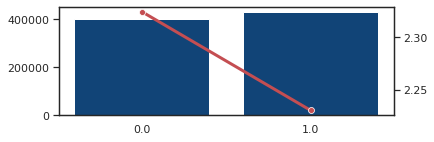

,IS_CUST_DEPO,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
1,0.0,400737,51.77015,9315,49.264861,2.324467
0,1.0,430153,48.22985,9593,50.735139,2.230137


In [138]:
univar_original(df,'IS_CUST_DEPO',Exclude_CERO='', cli_hoja=200,) #Exclude_Class_cero'TRUE'

    AVG_SAVINGS VS target
*   Tipo de variable:  Numérica con MÁS de 10 categorías, su discretización es la siguiente


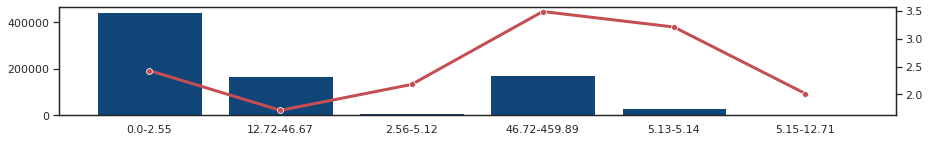

,INTERVALO,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0.0-2.55,444437,53.489271,10797,57.102814,2.429366
1,2.56-5.12,170408,20.509093,3714,19.642479,2.179475
2,5.13-5.14,9377,1.128549,301,1.591919,3.209982
3,5.15-12.71,174695,21.025045,3522,18.627036,2.016085
4,12.72-46.67,30511,3.672087,523,2.766025,1.714136
5,46.72-459.89,1462,0.175956,51,0.269727,3.488372


In [144]:
univar_original(TABLON_decil_ajuste_1,'AVG_SAVINGS',Exclude_CERO='', cli_hoja=1000,) #Exclude_Class_cero'TRUE'

    MAX_SAVINGS VS target
*   Tipo de variable:  Numérica con MÁS de 10 categorías, su discretización es la siguiente


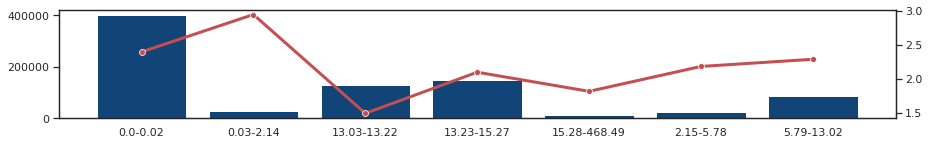

,INTERVALO,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0.0-0.02,400918,48.251634,9597,50.756294,2.393756
1,0.03-2.14,26577,3.198618,782,4.135816,2.942394
2,2.15-5.78,129701,15.609888,2828,14.956632,2.180400
3,5.79-13.02,150147,18.070623,3432,18.151047,2.285760
4,13.03-13.22,12804,1.540998,191,1.010154,1.491721
5,13.23-15.27,24241,2.917474,508,2.686693,2.095623
6,15.28-468.49,86502,10.410764,1570,8.303364,1.814987


In [145]:
univar_original(TABLON_decil_ajuste_1,'MAX_SAVINGS',Exclude_CERO='', cli_hoja=1000,) #Exclude_Class_cero'TRUE'

    MAX_PERC_SAVINGS VS target
*   Tipo de variable:  Numérica con MÁS de 10 categorías, su discretización es la siguiente


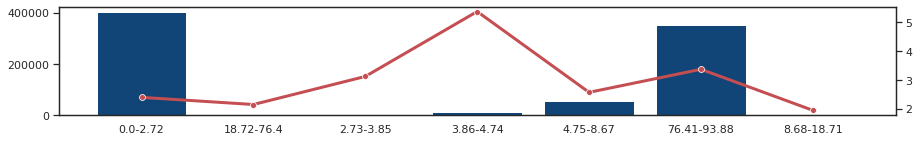

,INTERVALO,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0.0-2.72,403587,48.572856,9662,51.100063,2.394032
1,2.73-3.85,4967,0.597793,155,0.819759,3.120596
2,3.86-4.74,2696,0.324471,145,0.766871,5.378338
3,4.75-8.67,11836,1.424497,304,1.607785,2.568435
4,8.68-18.71,56546,6.805474,1098,5.807066,1.941782
5,18.72-76.4,350516,42.185608,7519,39.766237,2.145123
6,76.41-93.88,742,0.089302,25,0.132219,3.369272


In [141]:
univar_original(TABLON_decil_ajuste_1,'MAX_PERC_SAVINGS',Exclude_CERO='', cli_hoja=500,) #Exclude_Class_cero'TRUE'

    AVG_PERC_SAVINGS VS target
*   Tipo de variable:  Numérica con MÁS de 10 categorías, su discretización es la siguiente


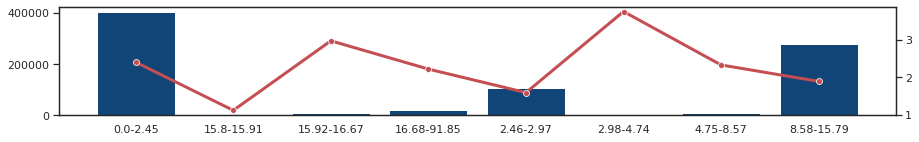

,INTERVALO,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0.0-2.45,402916,48.492099,9658,51.078908,2.397026
1,2.46-2.97,1072,0.129018,17,0.089909,1.585821
2,2.98-4.74,7914,0.952473,297,1.570764,3.752843
3,4.75-8.57,19574,2.355787,455,2.406389,2.324512
4,8.58-15.79,106856,12.860427,2015,10.656865,1.885715
5,15.8-15.91,6391,0.769175,71,0.375502,1.110937
6,15.92-16.67,7947,0.956444,236,1.248149,2.969674
7,16.68-91.85,278220,33.484577,6159,32.573514,2.213716


In [142]:
univar_original(TABLON_decil_ajuste_1,'AVG_PERC_SAVINGS',Exclude_CERO='', cli_hoja=500,) #Exclude_Class_cero'TRUE'

    NUM_TARIFF_PROP VS target
*   Tipo de variable:  Numérica con MÁS de 10 categorías, su discretización es la siguiente


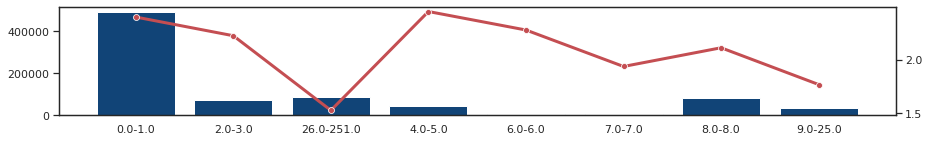

,INTERVALO,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0.0-1.0,492998,59.333726,11833,62.581976,2.400213
1,2.0-3.0,72254,8.695977,1608,8.504337,2.225482
2,4.0-5.0,88468,10.647378,2169,11.471335,2.451734
3,6.0-6.0,42959,5.170239,979,5.177703,2.278917
4,7.0-7.0,8358,1.005909,162,0.856780,1.938263
5,8.0-8.0,5537,0.666394,117,0.618786,2.113058
6,9.0-25.0,83409,10.038513,1476,7.806220,1.769593
7,26.0-251.0,36907,4.441864,564,2.982864,1.528165


In [143]:
univar_original(TABLON_decil_ajuste_1,'NUM_TARIFF_PROP',Exclude_CERO='', cli_hoja=500,) #Exclude_Class_cero'TRUE'

In [ ]:

IS_CUST_DEPO,
AVG_SAVINGS, 
MAX_SAVINGS,
MAX_PERC_SAVINGS, 
AVG_PERC_SAVINGS, 
NUM_TARIFF_PROP

    GB_EXCESO VS target
*   Tipo de variable:  Numérica con MÁS de 10 categorías, su discretización es la siguiente


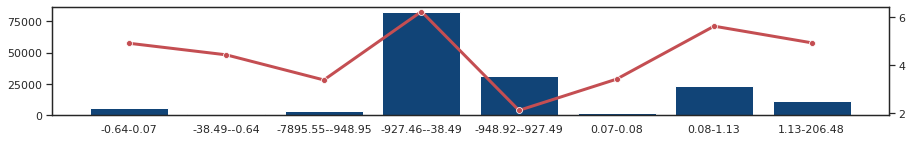

,INTERVALO,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,-7895.55--948.95,6095,3.782918,206,2.716603,3.379820
1,-948.92--927.49,898,0.557352,19,0.250560,2.115813
2,-927.46--38.49,3823,2.372780,238,3.138599,6.225477
3,-38.49--0.64,82596,51.263973,3654,48.186733,4.423943
4,-0.64-0.07,31565,19.591110,1549,20.427272,4.907334
5,0.07-0.08,1553,0.963884,53,0.698932,3.412750
6,0.08-1.13,23218,14.410467,1304,17.196360,5.616332
7,1.13-206.48,11371,7.057516,560,7.384940,4.924809


In [98]:
univar_original(TABLON_decil_ajuste_1,'GB_EXCESO',Exclude_CERO='', cli_hoja=500,) #Exclude_Class_cero'TRUE'


    Lineas_Con_Bono_Sin_Uso VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   SE MANTIENE TODAS LAS CATEGORIAS
*   Tipo de variable: Numérica con menos de 10 categorías


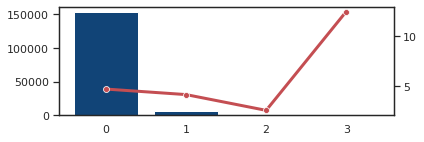

,Lineas_Con_Bono_Sin_Uso,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0,154044,95.608836,7288,96.109719,4.731116
1,1,6990,4.338408,292,3.850719,4.177396
2,2,77,0.047791,2,0.026375,2.597403
3,3,8,0.004965,1,0.013187,12.500000


In [78]:
univar_original(TABLON_decil_ajuste_1,'Lineas_Con_Bono_Sin_Uso',Exclude_CERO='', cli_hoja=500,) #Exclude_Class_cero'TRUE'

    FLAG_useless_line VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   SE MANTIENE TODAS LAS CATEGORIAS
*   Tipo de variable: Numérica con menos de 10 categorías


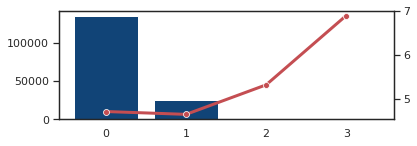

,FLAG_useless_line,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0,135028,83.806379,6366,83.950943,4.714578
1,1,25611,15.895704,1191,15.706185,4.650346
2,2,451,0.279917,24,0.316497,5.321508
3,3,29,0.017999,2,0.026375,6.896552


In [79]:
univar_original(TABLON_decil_ajuste_1,'FLAG_useless_line',Exclude_CERO='', cli_hoja=500,) #Exclude_Class_cero'TRUE'

In [ ]:
## --> nota corregir flag de usless line a >= 2 

    Lineas_Exceso VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   SE MANTIENE TODAS LAS CATEGORIAS
*   Tipo de variable: Numérica con menos de 10 categorías


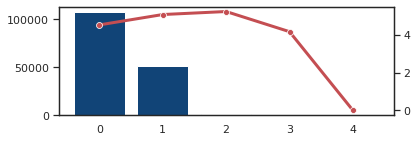

,Lineas_Exceso,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0,107986,67.022511,4886,64.433601,4.524661
1,1,51181,31.765962,2597,34.247659,5.074149
2,2,1796,1.114704,94,1.239615,5.233853
3,3,144,0.089375,6,0.079124,4.166667
4,4,12,0.007448,0,0.000000,0.000000


In [80]:
univar_original(TABLON_decil_ajuste_1,'Lineas_Exceso',Exclude_CERO='', cli_hoja=500,) #Exclude_Class_cero'TRUE'

    lineas_GB_Exceso VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   SE MANTIENE TODAS LAS CATEGORIAS
*   Tipo de variable: Numérica con menos de 10 categorías


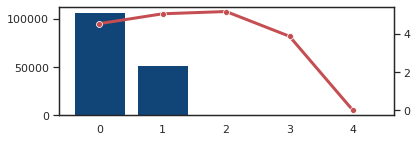

,lineas_GB_Exceso,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0,107083,66.462056,4855,64.024792,4.533866
1,1,52011,32.281109,2626,34.630094,5.048932
2,2,1858,1.153185,96,1.265990,5.166846
3,3,155,0.096202,6,0.079124,3.870968
4,4,12,0.007448,0,0.000000,0.000000


In [81]:
univar_original(TABLON_decil_ajuste_1,'lineas_GB_Exceso',Exclude_CERO='', cli_hoja=500,) #Exclude_Class_cero'TRUE'

    NUM_LLAMADAS_WRONG_TARIFF VS target
*   Tipo de variable:  Numérica con MÁS de 10 categorías, su discretización es la siguiente


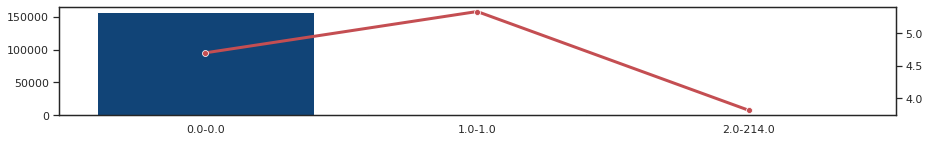

,INTERVALO,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0.0-0.0,157777,97.925757,7417,97.810893,4.700939
1,1.0-1.0,2529,1.569647,135,1.780298,5.338078
2,2.0-214.0,813,0.504596,31,0.408809,3.813038


In [82]:
univar_original(TABLON_decil_ajuste_1,'NUM_LLAMADAS_WRONG_TARIFF',Exclude_CERO='', cli_hoja=500,) #Exclude_Class_cero'TRUE'

    NUM_DISC_NEXT_2_MONTHS_DEAC VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   SE MANTIENE TODAS LAS CATEGORIAS
*   Tipo de variable: Numérica con menos de 10 categorías


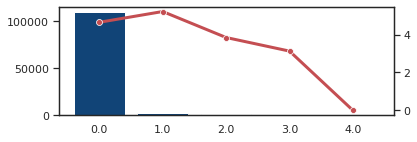

,NUM_DISC_NEXT_2_MONTHS_DEAC,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0.0,110193,68.392306,5118,67.493077,4.644578
1,1.0,2091,1.297799,109,1.437426,5.212817
2,2.0,989,0.613832,38,0.501121,3.842265
3,3.0,32,0.019861,1,0.013187,3.125000
4,4.0,13,0.008069,0,0.000000,0.000000


In [83]:
univar_original(TABLON_decil_ajuste_1,'NUM_DISC_NEXT_2_MONTHS_DEAC',Exclude_CERO='', cli_hoja=500,) #Exclude_Class_cero'TRUE'

    NUM_DISC_NEXT_MONTH_DEAC VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   SE MANTIENE TODAS LAS CATEGORIAS
*   Tipo de variable: Numérica con menos de 10 categorías


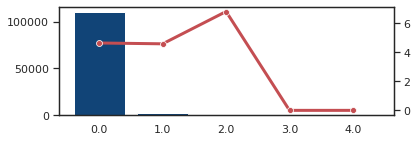

,NUM_DISC_NEXT_MONTH_DEAC,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0.0,110390,68.514576,5130,67.651325,4.647160
1,1.0,2832,1.757707,130,1.714361,4.590395
2,2.0,88,0.054618,6,0.079124,6.818182
3,3.0,6,0.003724,0,0.000000,0.000000
4,4.0,2,0.001241,0,0.000000,0.000000


In [84]:
univar_original(TABLON_decil_ajuste_1,'NUM_DISC_NEXT_MONTH_DEAC',Exclude_CERO='', cli_hoja=500,) #Exclude_Class_cero'TRUE'

    Lineas_Sin_Uso VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   SE MANTIENE TODAS LAS CATEGORIAS
*   Tipo de variable: Numérica con menos de 10 categorías


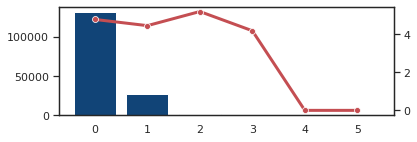

,Lineas_Sin_Uso,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0,131954,81.898473,6280,82.816827,4.759234
1,1,27559,17.104749,1222,16.114994,4.434123
2,2,1469,0.911748,76,1.002242,5.173587
3,3,120,0.074479,5,0.065937,4.166667
4,4,15,0.009310,0,0.000000,0.000000
5,5,2,0.001241,0,0.000000,0.000000


In [85]:
univar_original(TABLON_decil_ajuste_1,'Lineas_Sin_Uso',Exclude_CERO='', cli_hoja=500,) #Exclude_Class_cero'TRUE'

    lineas_sin_uso_m1 VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   SE MANTIENE TODAS LAS CATEGORIAS
*   Tipo de variable: Numérica con menos de 10 categorías


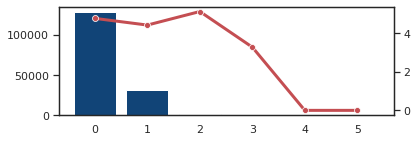

,lineas_sin_uso_m1,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0,128385,79.683340,6126,80.785969,4.771585
1,1,31072,19.285125,1375,18.132665,4.425206
2,2,1521,0.944023,78,1.028617,5.128205
3,3,122,0.075720,4,0.052750,3.278689
4,4,17,0.010551,0,0.000000,0.000000
5,5,2,0.001241,0,0.000000,0.000000


In [86]:
univar_original(TABLON_decil_ajuste_1,'lineas_sin_uso_m1',Exclude_CERO='', cli_hoja=500,) #Exclude_Class_cero'TRUE'

    Lineas_Poco_Uso VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   SE MANTIENE TODAS LAS CATEGORIAS
*   Tipo de variable: Numérica con menos de 10 categorías


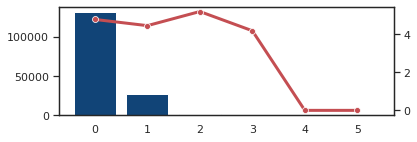

,Lineas_Poco_Uso,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0,131954,81.898473,6280,82.816827,4.759234
1,1,27559,17.104749,1222,16.114994,4.434123
2,2,1469,0.911748,76,1.002242,5.173587
3,3,120,0.074479,5,0.065937,4.166667
4,4,15,0.009310,0,0.000000,0.000000
5,5,2,0.001241,0,0.000000,0.000000


In [87]:
univar_original(TABLON_decil_ajuste_1,'Lineas_Poco_Uso',Exclude_CERO='', cli_hoja=500,) #Exclude_Class_cero'TRUE'

    INCR_PORCENTUAL_USO VS target
*   Tipo de variable:  Numérica con MÁS de 10 categorías, su discretización es la siguiente


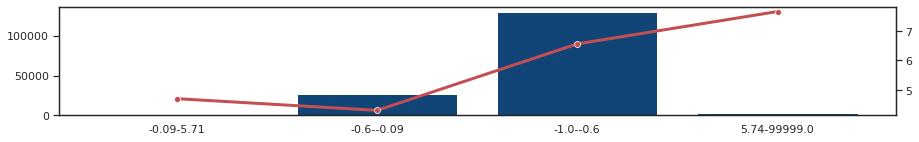

,INTERVALO,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,-1.0--0.6,716,0.444392,47,0.619807,6.564246
1,-0.6--0.09,26953,16.728629,1161,15.310563,4.307498
2,-0.09-5.71,130161,80.785630,6123,80.746406,4.704174
3,5.74-99999.0,3289,2.041348,252,3.323223,7.661903


In [88]:
univar_original(TABLON_decil_ajuste_1,'INCR_PORCENTUAL_USO',Exclude_CERO='', cli_hoja=500,) #Exclude_Class_cero'TRUE'

    FACTURACION_MEDIA_USO VS target
*   Tipo de variable:  Numérica con MÁS de 10 categorías, su discretización es la siguiente


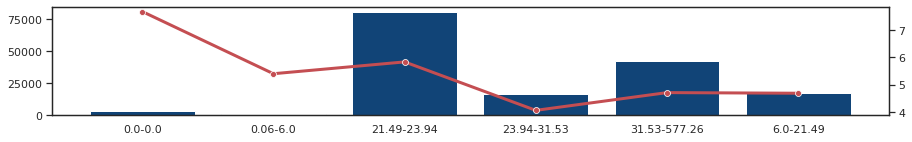

,INTERVALO,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0.0-0.0,3256,2.020867,250,3.296848,7.678133
1,0.06-6.0,722,0.448116,39,0.514308,5.401662
2,6.0-21.49,80831,50.168509,3789,49.967032,4.687558
3,21.49-23.94,16489,10.234051,962,12.686272,5.834192
4,23.94-31.53,42307,26.258231,1718,22.655941,4.060794
5,31.53-577.26,17514,10.870226,825,10.879599,4.710517


In [90]:
univar_original(TABLON_decil_ajuste_1,'FACTURACION_MEDIA_USO',Exclude_CERO='', cli_hoja=500,) #Exclude_Class_cero'TRUE'

    VARIACION_ABSOLUTA_USO VS target
*   Tipo de variable:  Numérica con MÁS de 10 categorías, su discretización es la siguiente


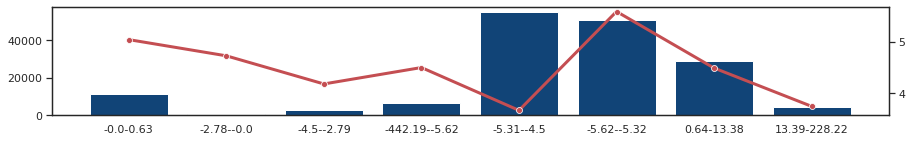

,INTERVALO,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,-442.19--5.62,11128,6.906696,501,6.606884,4.502157
1,-5.62--5.32,734,0.455564,41,0.540683,5.585831
2,-5.31--4.5,2722,1.689435,100,1.318739,3.673769
3,-4.5--2.79,6739,4.182623,282,3.718845,4.184597
4,-2.78--0.0,55298,34.321216,2615,34.485032,4.728923
5,-0.0-0.63,50969,31.634382,2570,33.891600,5.042281
6,0.64-13.38,29184,18.113320,1311,17.288672,4.492188
7,13.39-228.22,4345,2.696765,163,2.149545,3.751438


In [89]:
univar_original(TABLON_decil_ajuste_1,'VARIACION_ABSOLUTA_USO',Exclude_CERO='', cli_hoja=500,) #Exclude_Class_cero'TRUE'

In [91]:
df_2=TABLON_decil_ajuste_1.copy()

In [94]:
df_2=df_2[df_2['INCR_PORCENTUAL_USO']>0.04] 
#df_2=df_2[df_2['Decil']<3] 
df_2

,YEAR,MONTH,EOP,BRAND_DS,CUSTOMER_ID,MIN_SERV_ACTIVATION_DATE,MAX_SERV_DEACTIVATION_DATE,NUM_ACCS_TOTA,NUM_ACCS_ACTI,NUM_ACCS_DEAC,...,FACTURACION_MEDIA_USO,FACTURACION_USO,INCR_PORCENTUAL_USO,VARIACION_ABSOLUTA_USO,SEG_proceso,SEG_Calidad,SEG_Heavy_Callers,SEG_Wrong_Tariff,SEG_Competitors,SEGMENTO_CHURN_1P
16,2020,8,202008,YOIGO,784286,2008-12-27,2017-08-08,8,0,0,...,9.593333,11.94,0.244614,2.346667,0,0,0,1,1,4_WRONG TARIFF
17,2020,8,202008,YOIGO,1937243,2010-05-11,2020-08-21,9,0,2,...,23.620000,26.45,0.119814,2.830000,0,0,0,1,0,4_WRONG TARIFF
24,2020,8,202008,YOIGO,600956,2008-09-06,2017-11-17,9,0,0,...,25.030000,27.25,0.088694,2.220000,0,1,1,1,0,2_TECHNICAL PROBLEMS
25,2020,8,202008,YOIGO,2731367,2011-02-14,2020-08-12,9,0,1,...,24.886667,38.91,0.563488,14.023333,0,0,0,1,1,4_WRONG TARIFF
27,2020,8,202008,YOIGO,530722,2008-07-09,2020-08-13,8,0,1,...,19.673333,20.66,0.050152,0.986667,0,1,0,1,1,2_TECHNICAL PROBLEMS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53661,2020,8,202008,YOIGO,6895523,2015-08-13,2020-08-14,3,3,1,...,91.960000,98.17,0.067529,6.210000,0,0,1,1,0,4_WRONG TARIFF
53666,2020,8,202008,YOIGO,7512074,2016-08-31,2020-08-19,4,1,1,...,32.230000,36.33,0.127211,4.100000,0,0,0,1,0,4_WRONG TARIFF
53674,2020,8,202008,YOIGO,3592806,2011-11-14,2020-07-17,5,0,0,...,33.500000,42.14,0.257910,8.640000,1,0,1,1,1,1_PROCESS ISSUE
53677,2020,8,202008,YOIGO,4130125,2012-05-11,2020-07-31,5,2,0,...,33.136667,40.49,0.221909,7.353333,0,0,1,1,0,4_WRONG TARIFF


    INCR_PORCENTUAL_USO VS target
*   Tipo de variable:  Numérica con MÁS de 10 categorías, su discretización es la siguiente


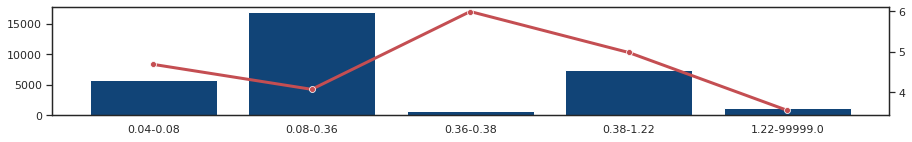

,INTERVALO,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0.04-0.08,5846,18.094030,274,19.201121,4.686965
1,0.08-0.36,16939,52.428116,689,48.283111,4.067536
2,0.36-0.38,767,2.373952,46,3.223546,5.997392
3,0.38-1.22,7488,23.176205,373,26.138753,4.981303
4,1.22-99999.0,1269,3.927698,45,3.153469,3.546099


In [96]:
univar_original(df_2,'INCR_PORCENTUAL_USO',Exclude_CERO='', cli_hoja=500,) #Exclude_Class_cero'TRUE'

    INCR_PORCENTUAL_USO VS target
*   Tipo de variable:  Numérica con MÁS de 10 categorías, su discretización es la siguiente


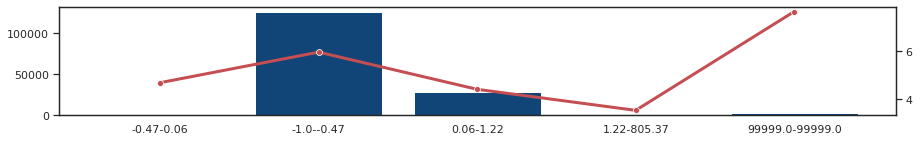

,INTERVALO,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,-1.0--0.47,2127,1.320142,127,1.674799,5.970851
1,-0.47-0.06,126397,78.449469,5924,78.122115,4.686820
2,0.06-1.22,28090,17.434319,1238,16.325992,4.407262
3,1.22-805.37,1249,0.775203,44,0.580245,3.522818
4,99999.0-99999.0,3256,2.020867,250,3.296848,7.678133


In [97]:
univar_original(TABLON_decil_ajuste_1,'INCR_PORCENTUAL_USO',Exclude_CERO='', cli_hoja=500,) #Exclude_Class_cero'TRUE'

In [ ]:
univar_original(TABLON_decil_ajuste_1,'',Exclude_CERO='', cli_hoja=500,)

    TICKETS_NETWORK VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   SE MANTIENE TODAS LAS CATEGORIAS
*   Tipo de variable: Numérica con menos de 10 categorías


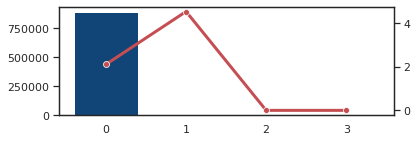

,TICKETS_NETWORK,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0,891903,99.994282,18857,99.989395,2.114243
1,1,44,0.004933,2,0.010605,4.545455
2,2,5,0.000561,0,0.000000,0.000000
3,3,2,0.000224,0,0.000000,0.000000


In [60]:
univar_original(TABLON_decil_ajuste_1,'TICKETS_NETWORK',Exclude_CERO='', cli_hoja=500,) #Exclude_Class_cero'TRUE'

    AVG_KPI_PERC_CSS_MOBI VS target
*   Tipo de variable:  Numérica con MÁS de 10 categorías, su discretización es la siguiente


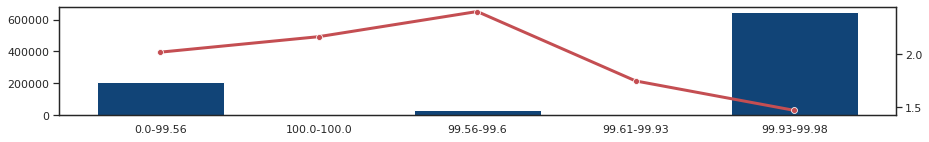

,INTERVALO,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0.0-99.56,207070,23.215323,4176,22.143274,2.016709
1,99.56-99.6,4422,0.495765,106,0.562066,2.397105
2,99.61-99.93,30617,3.432576,535,2.836842,1.747395
3,99.93-99.98,883,0.098996,13,0.068933,1.472254
4,100.0-100.0,648962,72.757340,14029,74.388886,2.161760


In [47]:
univar_original(df,'AVG_KPI_PERC_CSS_MOBI',Exclude_CERO='f', cli_hoja=500,) #Exclude_Class_cero'TRUE'

    AVG_KPI_PERC_CDR_MOBI VS target
*   Tipo de variable:  Numérica con MÁS de 10 categorías, su discretización es la siguiente


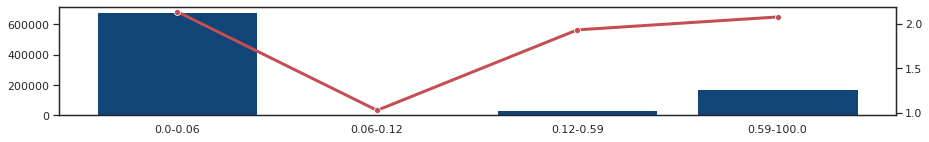

,INTERVALO,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0.0-0.06,683038,76.577716,14588,77.352988,2.135752
1,0.06-0.12,1074,0.120410,11,0.058328,1.024209
2,0.12-0.59,35552,3.985856,686,3.637521,1.929568
3,0.59-100.0,172290,19.316019,3574,18.951164,2.074409


In [48]:
univar_original(df,'AVG_KPI_PERC_CDR_MOBI',Exclude_CERO='f', cli_hoja=500,) #Exclude_Class_cero'TRUE'

In [ ]:
# css > 0 y menos a 99
# AVG_KPI_PERC_CDR_MOBI

    AVG_KPI_PERC_CDR_MOBI VS target
*   Tipo de variable:  Numérica con MÁS de 10 categorías, su discretización es la siguiente


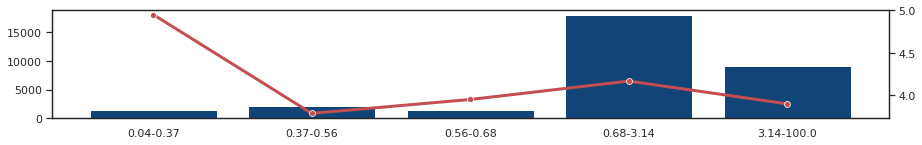

,INTERVALO,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0.04-0.37,1454,4.522551,72,5.471125,4.951857
1,0.37-0.56,2138,6.650078,81,6.155015,3.788587
2,0.56-0.68,1493,4.643857,59,4.483283,3.951775
3,0.68-3.14,18040,56.111975,752,57.142857,4.168514
4,3.14-100.0,9025,28.071540,352,26.747720,3.900277


In [56]:
df_T=df[df['AVG_KPI_PERC_CDR_MOBI']>0] 
df_T=df_T[df_T['Decil']<3] 
df_T

univar_original(df_T,'AVG_KPI_PERC_CDR_MOBI',Exclude_CERO='f', cli_hoja=1000,) #Exclude_Class_cero'TRUE'

    AVG_KPI_PERC_CSS_MOBI VS target
*   Tipo de variable:  Numérica con MÁS de 10 categorías, su discretización es la siguiente


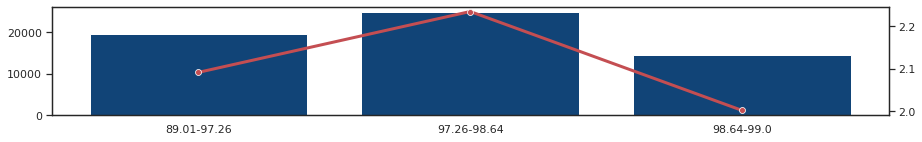

,INTERVALO,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,89.01-97.26,19555,33.244364,409,32.641660,2.091537
1,97.26-98.64,24883,42.302200,556,44.373504,2.234457
2,98.64-99.0,14384,24.453436,288,22.984836,2.002225


In [57]:
df_T_2=df[df['AVG_KPI_PERC_CSS_MOBI']>89] 
df_T_2=df_T_2[df_T_2['AVG_KPI_PERC_CSS_MOBI']<99] 
univar_original(df_T_2,'AVG_KPI_PERC_CSS_MOBI',Exclude_CERO='f', cli_hoja=10000,) #Exclude_Class_cero'TRUE'

    NUM_MONTH_BAD_THR_QOE_MOBI_6M VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   SE MANTIENE TODAS LAS CATEGORIAS
*   Tipo de variable: Numérica con menos de 10 categorías


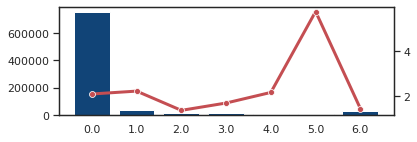

,NUM_MONTH_BAD_THR_QOE_MOBI_6M,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0.0,754577,84.598197,15871,84.156106,2.103298
1,1.0,42011,4.709996,937,4.968450,2.230368
3,2.0,19164,1.557816,265,1.405165,1.382801
4,3.0,13895,1.269460,237,1.256694,1.705650
5,4.0,11323,1.241432,246,1.304417,2.172569
6,5.0,11073,3.222476,635,3.367093,5.734670
2,6.0,28743,2.148541,420,2.227053,1.461225


In [62]:
univar_original(df,'NUM_MONTH_BAD_THR_QOE_MOBI_6M',Exclude_CERO='f', cli_hoja=500,) #Exclude_Class_cero'TRUE'

    AVG_THR_QOE_MOBI VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   SE MANTIENE TODAS LAS CATEGORIAS
*   Tipo de variable: Numérica con menos de 10 categorías


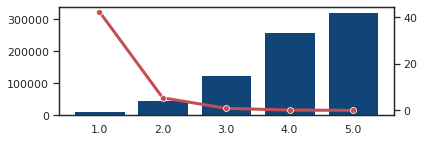

,AVG_THR_QOE_MOBI,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
4,1.0,12960,29.259805,5483.0,29.073652,42.307099
3,2.0,48180,13.974487,2588.0,13.722891,5.371523
2,3.0,124646,5.401624,1082.0,5.737314,0.868058
1,4.0,260984,1.452990,299.0,1.585450,0.114566
0,5.0,324095,0.000000,0.0,0.000000,0.000000


In [63]:
univar_original(df,'AVG_THR_QOE_MOBI',Exclude_CERO='f', cli_hoja=500,) #Exclude_Class_cero'TRUE'

In [ ]:
univar_original(df,'NUM_MONTH_BAD_THR_QOE_MOBI_6M',Exclude_CERO='f', cli_hoja=500,) #Exclude_Class_cero'TRUE'

In [ ]:
univar_original(df,'IS_DETERIORED_1M_AVG_THR_QOE_MOBI',Exclude_CERO='f', cli_hoja=500,) #Exclude_Class_cero'TRUE'

    NUM_MONTH_BAD_THR_QOE_MOBI_6M VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   LA CATEGORÍA NUM_MONTH_BAD_THR_QOE_MOBI_6M = 0 ES EXCLUIDA


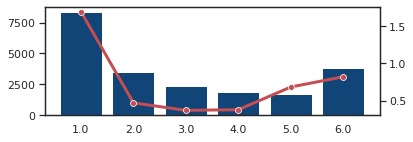

,NUM_MONTH_BAD_THR_QOE_MOBI_6M,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,1.0,8375,38.484514,369,38.278008,1.695616
2,2.0,3532,16.230126,103,10.684647,0.473302
3,3.0,2355,10.821616,81,8.402490,0.372208
4,4.0,1879,8.634317,83,8.609959,0.381399
5,5.0,1755,8.064516,149,15.456432,0.684680
1,6.0,3866,17.764911,179,18.568465,0.822535


In [22]:
univar_original(TABLON_decil_03,'NUM_MONTH_BAD_THR_QOE_MOBI_6M',Exclude_CERO='TRUE', cli_hoja=500,) #Exclude_Class_cero'TRUE'

    AVG_THR_QOE_MOBI VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   SE MANTIENE TODAS LAS CATEGORIAS
*   Tipo de variable: Numérica con menos de 10 categorías


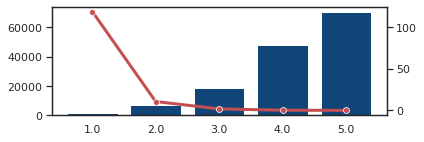

,AVG_THR_QOE_MOBI,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
4,1.0,1676,25.200045,1985.0,23.355689,118.436754
3,2.0,7232,9.733115,765.0,9.001059,10.577987
2,3.0,18355,3.834916,324.0,3.812213,1.765187
1,4.0,47523,0.888733,79.0,0.929521,0.166235
0,5.0,70464,0.000000,0.0,0.000000,0.000000


In [23]:
univar_original(TABLON_decil_03,'AVG_THR_QOE_MOBI',Exclude_CERO='', cli_hoja=500,) #Exclude_Class_cero'TRUE'

In [ ]:
# nueva variable de NUM_MONTH_BAD_THR_QOE_MOBI_6M y AVG_THR_QOE_MOBI

    NUM_LLAMADAS_NETWORK VS target
*   Tipo de variable:  Numérica con MÁS de 10 categorías, su discretización es la siguiente


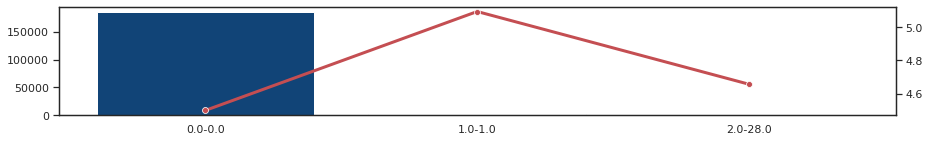

,INTERVALO,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0.0-0.0,186082,98.673794,8375,98.541005,4.500704
1,1.0-1.0,1728,0.916307,88,1.035416,5.092593
2,2.0-28.0,773,0.409899,36,0.423579,4.657180


In [24]:
univar_original(TABLON_decil_03,'NUM_LLAMADAS_NETWORK',Exclude_CERO='', cli_hoja=500) 

    IS_DETERIORED_1M_AVG_THR_QOE_MOBI VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   LA CATEGORÍA IS_DETERIORED_1M_AVG_THR_QOE_MOBI = 0 ES EXCLUIDA


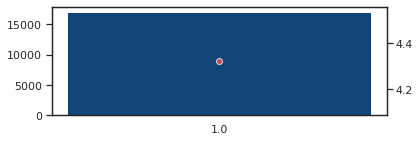

,IS_DETERIORED_1M_AVG_THR_QOE_MOBI,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,1.0,17072,100.0,738,100.0,4.322868


In [28]:
univar_original(TABLON_decil_03,'IS_DETERIORED_1M_AVG_THR_QOE_MOBI',Exclude_CERO='TRUE', cli_hoja=500) 

    Mobile_Red_Incidences VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   LA CATEGORÍA Mobile_Red_Incidences = 0 ES EXCLUIDA


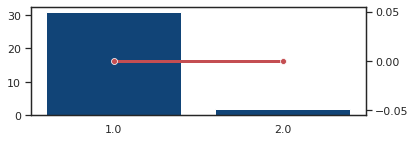

,Mobile_Red_Incidences,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,1.0,31,93.939394,0,0.0,0.0
1,2.0,2,6.060606,0,0.0,0.0


In [27]:
univar_original(TABLON_decil_03,'Mobile_Red_Incidences',Exclude_CERO='TRUE', cli_hoja=500) 

In [20]:
univar_original(df,'CLAIMS',Exclude_CERO='') #Exclude_Class_cero'TRUE'

TypeError: univar_original() missing 1 required positional argument: 'cli_hoja'

    CLAIMS VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   LA CATEGORÍA CLAIMS = 0 ES EXCLUIDA


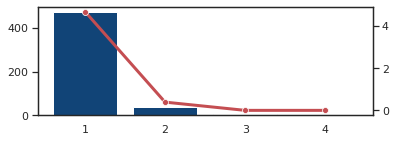

,CLAIMS,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,1,473,92.023346,24,92.307692,4.669261
1,2,36,7.003891,2,7.692308,0.389105
2,3,4,0.778210,0,0.000000,0.000000
3,4,1,0.194553,0,0.000000,0.000000


In [24]:
univar_original(df,'CLAIMS',Exclude_CERO='TRUE') #Exclude_Class_cero'TRUE'

    MOBILE_INCIDENCES VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   SE MANTIENE TODAS LAS CATEGORIAS
*   Tipo de variable: Numérica con menos de 10 categorías


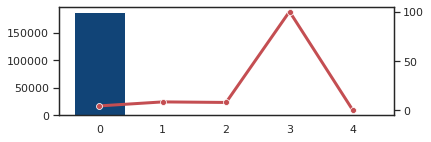

,MOBILE_INCIDENCES,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0,188368,99.885992,8480,99.776444,4.501826
1,1,187,0.099161,16,0.188257,8.556150
2,2,25,0.013257,2,0.023532,8.000000
4,3,1,0.001061,1,0.011766,100.000000
3,4,2,0.000530,0,0.000000,0.000000


In [25]:
univar_original(df,'MOBILE_INCIDENCES',Exclude_CERO='') #Exclude_Class_cero'TRUE'

    MOBILE_INCIDENCES VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   LA CATEGORÍA MOBILE_INCIDENCES = 0 ES EXCLUIDA


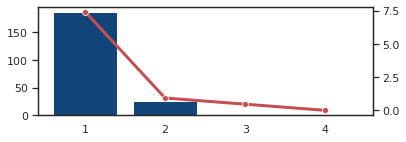

,MOBILE_INCIDENCES,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,1,187,86.976744,16,84.210526,7.441860
1,2,25,11.627907,2,10.526316,0.930233
3,3,1,0.465116,1,5.263158,0.465116
2,4,2,0.930233,0,0.000000,0.000000


In [26]:
univar_original(df,'MOBILE_INCIDENCES',Exclude_CERO='TRUE') #Exclude_Class_cero'TRUE'

In [371]:
#univar_original(df,'NUM_RECA',Exclude_CERO='TRUE') #Exclude_Class_cero'TRUE'

#### Ejecucion variables de interés

    AVG_DL_PEAK_THR_KBPS_MOBI VS target
*   Tipo de variable:  Numérica con MÁS de 10 categorías, su discretización es la siguiente


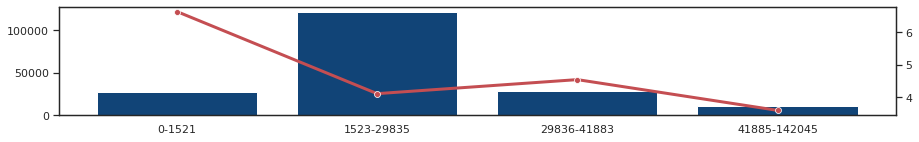

,INTERVALO,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0-1521,27232,14.440326,1807,21.261325,6.635576
1,1523-29835,121826,64.600733,4998,58.806918,4.102573
2,29836-41883,29127,15.445189,1321,15.543005,4.535311
3,41885-142045,10398,5.513753,373,4.388752,3.587228


In [408]:
univar_original(df,'AVG_DL_PEAK_THR_KBPS_MOBI',Exclude_CERO='')  

    AVG_KPI_PERC_CDR_MOBI VS target
*   Tipo de variable:  Numérica con MÁS de 10 categorías, su discretización es la siguiente


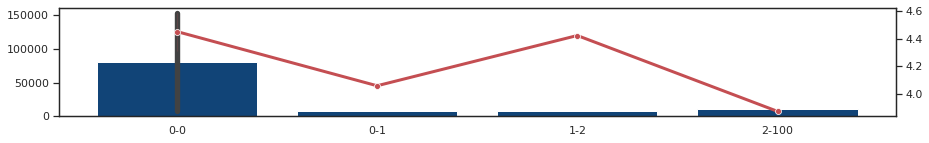

,INTERVALO,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0-0,153964,81.642566,7067,83.150959,4.590034
1,0-0,7556,4.006724,326,3.835745,4.314452
2,0-1,7883,4.180122,320,3.765149,4.059368
3,1-2,7822,4.147776,346,4.071067,4.423421
4,2-100,11358,6.022812,440,5.177080,3.873921


In [410]:
univar_original(df,'AVG_KPI_PERC_CDR_MOBI',Exclude_CERO='')  

    MOBILE_INCIDENCES VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   SE MANTIENE TODAS LAS CATEGORIAS
*   Tipo de variable: Numérica con menos de 10 categorías


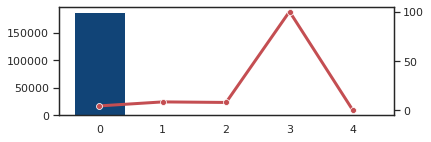

,MOBILE_INCIDENCES,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0,188368,99.885992,8480,99.776444,4.501826
1,1,187,0.099161,16,0.188257,8.556150
2,2,25,0.013257,2,0.023532,8.000000
4,3,1,0.001061,1,0.011766,100.000000
3,4,2,0.000530,0,0.000000,0.000000


In [411]:
# CON CEROS
univar_original(df,'MOBILE_INCIDENCES',Exclude_CERO='')  

    MOBILE_INCIDENCES VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   LA CATEGORÍA MOBILE_INCIDENCES = 0 ES EXCLUIDA


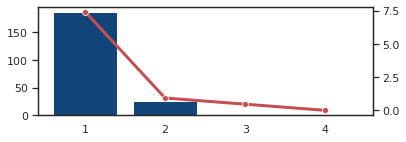

,MOBILE_INCIDENCES,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,1,187,86.976744,16,84.210526,7.441860
1,2,25,11.627907,2,10.526316,0.930233
3,3,1,0.465116,1,5.263158,0.465116
2,4,2,0.930233,0,0.000000,0.000000


In [412]:
# SIN CEROS
univar_original(df,'MOBILE_INCIDENCES',Exclude_CERO='TRUE')  

    BILLING_CLAIMS VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   SE MANTIENE TODAS LAS CATEGORIAS
*   Tipo de variable: Numérica con menos de 10 categorías


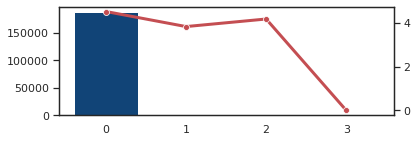

,BILLING_CLAIMS,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0,188244,99.820238,8486,99.847041,4.507979
1,1,314,0.166505,12,0.141193,3.821656
2,2,24,0.012726,1,0.011766,4.166667
3,3,1,0.000530,0,0.000000,0.000000


In [413]:
# CON CEROS
univar_original(df,'BILLING_CLAIMS',Exclude_CERO='')

    BILLING_CLAIMS VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   LA CATEGORÍA BILLING_CLAIMS = 0 ES EXCLUIDA


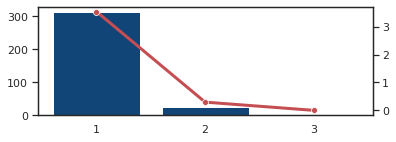

,BILLING_CLAIMS,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,1,314,92.625369,12,92.307692,3.539823
1,2,24,7.079646,1,7.692308,0.294985
2,3,1,0.294985,0,0.000000,0.000000


In [414]:
# SIN CEROS
univar_original(df,'BILLING_CLAIMS',Exclude_CERO='TRUE')

    CLAIMS VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   LA CATEGORÍA CLAIMS = 0 ES EXCLUIDA


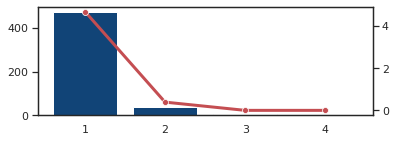

,CLAIMS,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,1,473,92.023346,24,92.307692,4.669261
1,2,36,7.003891,2,7.692308,0.389105
2,3,4,0.778210,0,0.000000,0.000000
3,4,1,0.194553,0,0.000000,0.000000


In [415]:
# CON CEROS
univar_original(df,'CLAIMS',Exclude_CERO='TRUE')

In [416]:
#univar_original(df,'ISSUE_CALL',Exclude_CERO='')

    NUM_TOTA_WAIT_MORE_5MIN VS target
*   Tipo de variable:  Numérica con MÁS de 10 categorías, su discretización es la siguiente


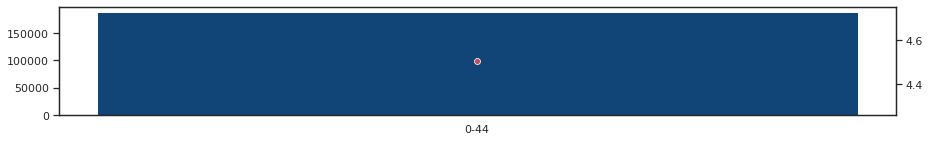

,INTERVALO,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0-44,188583,100.0,8499,100.0,4.506769


In [417]:
univar_original(df,'NUM_TOTA_WAIT_MORE_5MIN',Exclude_CERO='')

    IVR_NUM_TOTA_WAIT_MORE_5MIN VS target
*   Tipo de variable:  Numérica con MÁS de 10 categorías, su discretización es la siguiente


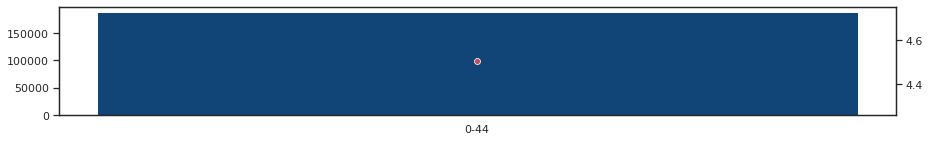

,INTERVALO,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0-44,188583,100.0,8499,100.0,4.506769


In [418]:
univar_original(df,'IVR_NUM_TOTA_WAIT_MORE_5MIN',Exclude_CERO='TRUE')

    NUM_RECA VS target
*   Tipo de variable:  Numérica con MÁS de 10 categorías, su discretización es la siguiente


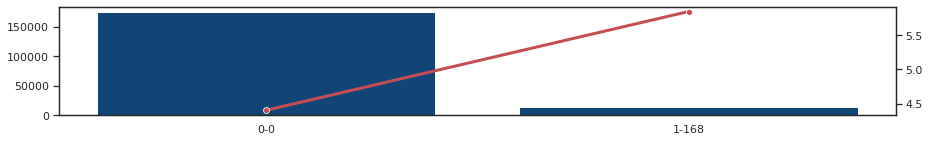

,INTERVALO,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0-0,175174,92.889603,7716,90.787151,4.404763
1,1-168,13409,7.110397,783,9.212849,5.839362


In [419]:
univar_original(df,'NUM_RECA',Exclude_CERO='')

    NUM_LLAMADAS_PROCESS VS target
*   Tipo de variable:  Numérica con MÁS de 10 categorías, su discretización es la siguiente


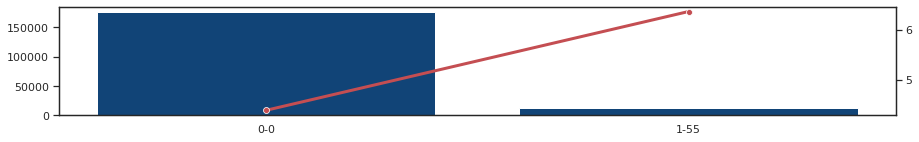

,INTERVALO,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0-0,176767,93.734324,7747,91.1519,4.382605
1,1-55,11816,6.265676,752,8.8481,6.364252


In [420]:
univar_original(df,'NUM_LLAMADAS_PROCESS',Exclude_CERO='')

    NUM_LLAMADAS_HEAVY_CALLERS VS target
*   Tipo de variable:  Numérica con MÁS de 10 categorías, su discretización es la siguiente


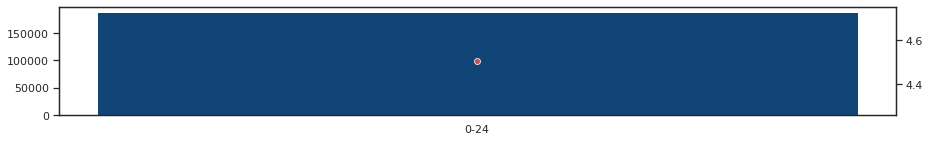

,INTERVALO,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0-24,188583,100.0,8499,100.0,4.506769


In [421]:
univar_original(df,'NUM_LLAMADAS_HEAVY_CALLERS',Exclude_CERO='f')

    NUM_LLAMADAS_WRONG_TARIFF VS target
*   Tipo de variable:  Numérica con MÁS de 10 categorías, su discretización es la siguiente


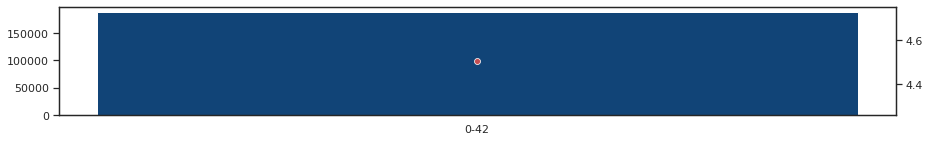

,INTERVALO,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0-42,188583,100.0,8499,100.0,4.506769


In [437]:
univar_original(df,'NUM_LLAMADAS_WRONG_TARIFF',Exclude_CERO='T')

    IS_DETERIORED_1M_AVG_KPI_QOE_MOBI VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   SE MANTIENE TODAS LAS CATEGORIAS
*   Tipo de variable: Numérica con menos de 10 categorías


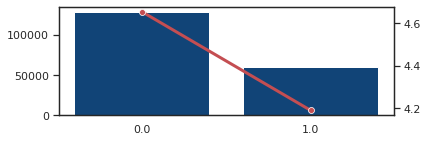

,IS_DETERIORED_1M_AVG_KPI_QOE_MOBI,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0.0,128686,68.238388,5989,70.467114,4.653964
1,1.0,59897,31.761612,2510,29.532886,4.190527


In [436]:
univar_original(df,'IS_DETERIORED_1M_AVG_KPI_QOE_MOBI',Exclude_CERO='F') # 1mes

    TOTAL_BLUE_TICKETS VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   SE MANTIENE TODAS LAS CATEGORIAS
*   Tipo de variable: Numérica con menos de 10 categorías


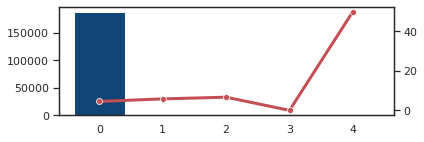

,TOTAL_BLUE_TICKETS,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0,187894,99.634644,8458,99.517590,4.501474
1,1,620,0.328768,36,0.423579,5.806452
2,2,60,0.031816,4,0.047064,6.666667
3,3,7,0.003712,0,0.000000,0.000000
4,4,2,0.001061,1,0.011766,50.000000


In [438]:
univar_original(df,'TOTAL_BLUE_TICKETS',Exclude_CERO='')

    TOTAL_BLUE_TICKETS VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   LA CATEGORÍA TOTAL_BLUE_TICKETS = 0 ES EXCLUIDA


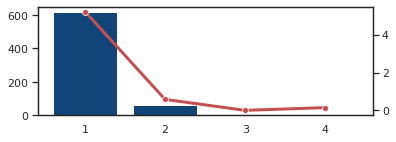

,TOTAL_BLUE_TICKETS,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,1,620,89.985486,36,87.804878,5.224964
1,2,60,8.708273,4,9.756098,0.580552
2,3,7,1.015965,0,0.000000,0.000000
3,4,2,0.290276,1,2.439024,0.145138


In [425]:
univar_original(df,'TOTAL_BLUE_TICKETS',Exclude_CERO='TRUE')

    TICKETS_NETWORK VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   SE MANTIENE TODAS LAS CATEGORIAS
*   Tipo de variable: Numérica con menos de 10 categorías


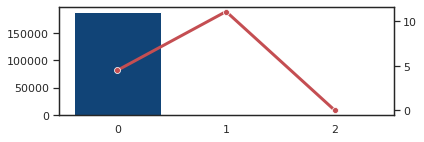

,TICKETS_NETWORK,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0,188564,99.989925,8497,99.976468,4.506162
1,1,18,0.009545,2,0.023532,11.111111
2,2,1,0.000530,0,0.000000,0.000000


In [426]:
univar_original(df,'TICKETS_NETWORK',Exclude_CERO='')

    TICKETS_NETWORK VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   LA CATEGORÍA TICKETS_NETWORK = 0 ES EXCLUIDA


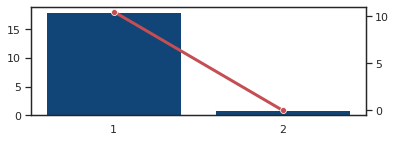

,TICKETS_NETWORK,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,1,18,94.736842,2,100.0,10.526316
1,2,1,5.263158,0,0.0,0.000000


In [427]:
univar_original(df,'TICKETS_NETWORK',Exclude_CERO='TRUE')

    AVG_THR_QOE_MOBI VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   SE MANTIENE TODAS LAS CATEGORIAS
*   Tipo de variable: Numérica con menos de 10 categorías


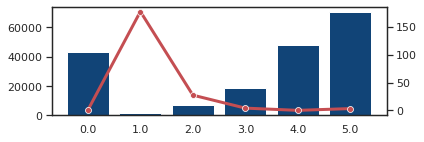

,AVG_THR_QOE_MOBI,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
2,0.0,43333,3.834916,324,3.812213,0.747698
5,1.0,1676,37.364980,2972,34.968820,177.326969
4,2.0,7232,25.200045,1985,23.355689,27.447456
3,3.0,18355,9.733115,765,9.001059,4.167802
1,4.0,47523,0.888733,79,0.929521,0.166235
0,5.0,70464,22.978211,2374,27.932698,3.369096


In [429]:
univar_original(df,'AVG_THR_QOE_MOBI',Exclude_CERO='')

    AVG_THR_QOE_MOBI VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   LA CATEGORÍA AVG_THR_QOE_MOBI = 0 ES EXCLUIDA


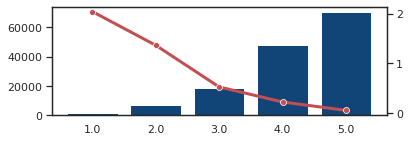

,AVG_THR_QOE_MOBI,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
4,1.0,1676,1.153873,2972,48.522449,2.046127
3,2.0,7232,4.979002,1985,32.408163,1.366609
2,3.0,18355,12.636833,765,12.489796,0.526678
1,4.0,47523,32.718072,324,5.289796,0.223064
0,5.0,70464,48.512220,79,1.289796,0.054389


In [439]:
univar_original(df,'AVG_THR_QOE_MOBI',Exclude_CERO='TRUE')

    Lineas_Exceso VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   SE MANTIENE TODAS LAS CATEGORIAS
*   Tipo de variable: Numérica con menos de 10 categorías


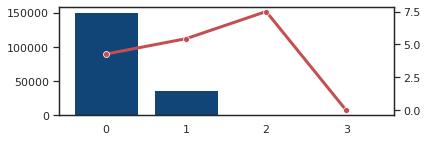

,Lineas_Exceso,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0,151527,80.350297,6475,76.185434,4.273166
1,1,36552,19.382447,1988,23.390987,5.438827
2,2,480,0.254530,36,0.423579,7.500000
3,3,24,0.012726,0,0.000000,0.000000


In [430]:
univar_original(df,'Lineas_Exceso',Exclude_CERO='')

    Lineas_Exceso VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   LA CATEGORÍA Lineas_Exceso = 0 ES EXCLUIDA


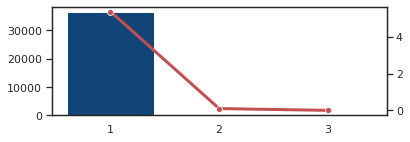

,Lineas_Exceso,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,1,36552,98.639896,1988,98.221344,5.364853
1,2,480,1.295337,36,1.778656,0.097150
2,3,24,0.064767,0,0.000000,0.000000


In [431]:
univar_original(df,'Lineas_Exceso',Exclude_CERO='TRUE')

    Lineas_Con_Bono_Sin_Uso VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   SE MANTIENE TODAS LAS CATEGORIAS
*   Tipo de variable: Numérica con menos de 10 categorías


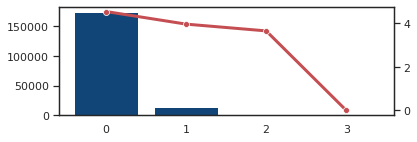

,Lineas_Con_Bono_Sin_Uso,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0,174583,92.576213,7944,93.469820,4.550271
1,1,13827,7.332050,549,6.459583,3.970493
2,2,164,0.086964,6,0.070597,3.658537
3,3,9,0.004772,0,0.000000,0.000000


In [432]:
univar_original(df,'Lineas_Con_Bono_Sin_Uso',Exclude_CERO='')

    Lineas_Con_Bono_Sin_Uso VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   LA CATEGORÍA Lineas_Con_Bono_Sin_Uso = 0 ES EXCLUIDA


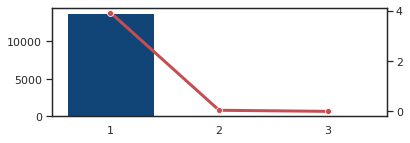

,Lineas_Con_Bono_Sin_Uso,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,1,13827,98.764286,549,98.918919,3.921429
1,2,164,1.171429,6,1.081081,0.042857
2,3,9,0.064286,0,0.000000,0.000000


In [433]:
univar_original(df,'Lineas_Con_Bono_Sin_Uso',Exclude_CERO='TRUE')

    FRIENDS_IS_CHURN_GMM VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   SE MANTIENE TODAS LAS CATEGORIAS
*   Tipo de variable: Numérica con menos de 10 categorías


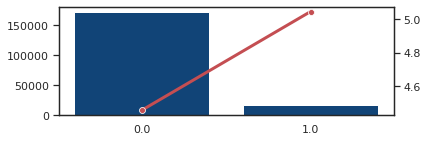

,FRIENDS_IS_CHURN_GMM,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0.0,171840,91.121681,7654,90.057654,4.454143
1,1.0,16743,8.878319,845,9.942346,5.046885


In [434]:
univar_original(df,'FRIENDS_IS_CHURN_GMM',Exclude_CERO='')

    FRIENDS_IS_CHURN_GMM VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   SE MANTIENE TODAS LAS CATEGORIAS
*   Tipo de variable: Numérica con menos de 10 categorías


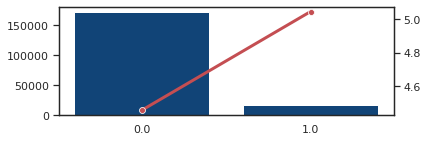

,FRIENDS_IS_CHURN_GMM,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0.0,171840,91.121681,7654,90.057654,4.454143
1,1.0,16743,8.878319,845,9.942346,5.046885


In [435]:
univar_original(df,'FRIENDS_IS_CHURN_GMM',Exclude_CERO='')

In [ ]:
# las que faltan por ver

In [28]:
TABLON_decil_03 = TABLON_decil_03.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' else x.fillna('.'))   

In [29]:
TABLON_decil_03[['ISSUE_CALL']]

,ISSUE_CALL
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
62751,0.0
62752,0.0
62753,0.0
62754,0.0


    ISSUE_CALL VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   SE MANTIENE TODAS LAS CATEGORIAS
*   Tipo de variable: Numérica con menos de 10 categorías


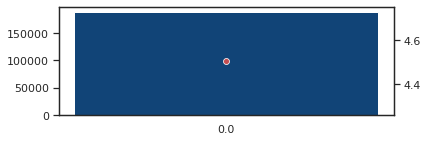

,ISSUE_CALL,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0.0,188583,100.0,8499,100.0,4.506769


In [30]:
univar_original(TABLON_decil_03,'ISSUE_CALL',Exclude_CERO='')

    NUM_LLAMADAS_COMPETITION VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   SE MANTIENE TODAS LAS CATEGORIAS
*   Tipo de variable: Numérica con menos de 10 categorías


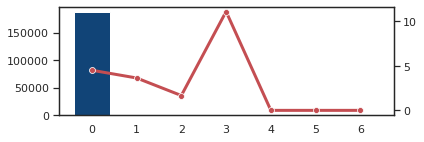

,NUM_LLAMADAS_COMPETITION,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0,188096,99.741758,8482.0,99.799976,4.509399
1,1,412,0.218471,15.0,0.176491,3.640777
2,2,60,0.031816,1.0,0.011766,1.666667
3,3,9,0.004772,1.0,0.011766,11.111111
4,4,2,0.001061,0.0,0.000000,0.000000
8,5,1,0.000000,0.0,0.000000,0.000000
7,6,1,0.000000,0.0,0.000000,0.000000
6,10,1,0.000530,0.0,0.000000,0.000000
5,19,1,0.000530,0.0,0.000000,0.000000


In [31]:
univar_original(TABLON_decil_03,'NUM_LLAMADAS_COMPETITION',Exclude_CERO='')

    NUM_LLAMADAS_COMPETITION VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   LA CATEGORÍA NUM_LLAMADAS_COMPETITION = 0 ES EXCLUIDA


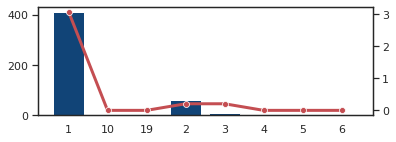

,NUM_LLAMADAS_COMPETITION,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,1,412,84.599589,15,88.235294,3.080082
1,2,60,12.320329,1,5.882353,0.205339
2,3,9,1.848049,1,5.882353,0.205339
3,4,2,0.410678,0,0.000000,0.000000
7,5,1,0.205339,0,0.000000,0.000000
6,6,1,0.205339,0,0.000000,0.000000
5,10,1,0.205339,0,0.000000,0.000000
4,19,1,0.205339,0,0.000000,0.000000


In [32]:
univar_original(TABLON_decil_03,'NUM_LLAMADAS_COMPETITION',Exclude_CERO='TRUE')

    TICKETS_NETWORK VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   SE MANTIENE TODAS LAS CATEGORIAS
*   Tipo de variable: Numérica con menos de 10 categorías


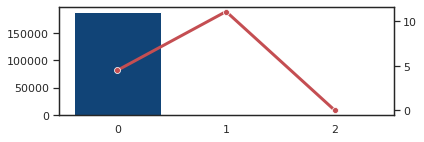

,TICKETS_NETWORK,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0,188564,99.989925,8497,99.976468,4.506162
1,1,18,0.009545,2,0.023532,11.111111
2,2,1,0.000530,0,0.000000,0.000000


In [33]:
univar_original(TABLON_decil_03,'TICKETS_NETWORK',Exclude_CERO='')

In [ ]:
univar_original(TABLON_decil_03,'TICKETS_PROCESS',Exclude_CERO='')

    TICKETS_HEAVY_CALLERS VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   SE MANTIENE TODAS LAS CATEGORIAS
*   Tipo de variable: Numérica con menos de 10 categorías


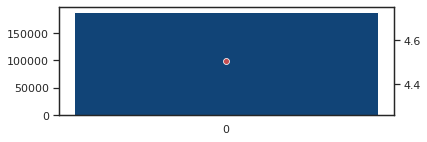

,TICKETS_HEAVY_CALLERS,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0,188583,100.0,8499,100.0,4.506769


In [34]:
univar_original(TABLON_decil_03,'TICKETS_HEAVY_CALLERS',Exclude_CERO='',cli_hoja=)

    TICKETS_RED VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   SE MANTIENE TODAS LAS CATEGORIAS
*   Tipo de variable: Numérica con menos de 10 categorías


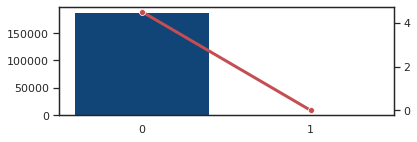

,TICKETS_RED,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0,188549,99.981971,8499,100.0,4.507582
1,1,34,0.018029,0,0.0,0.000000


In [35]:
univar_original(TABLON_decil_03,'TICKETS_RED',Exclude_CERO='')

    NUM_LLAMADAS_NETWORK VS target
*   Tipo de variable:  Numérica con MÁS de 10 categorías, su discretización es la siguiente


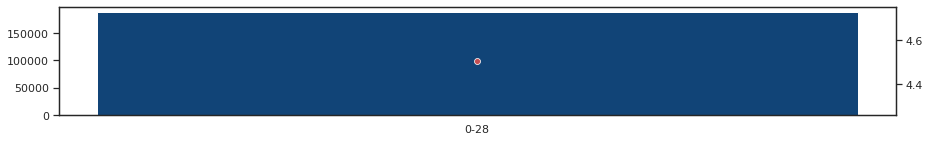

,INTERVALO,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0-28,188583,100.0,8499,100.0,4.506769


In [36]:
univar_original(TABLON_decil_03,'NUM_LLAMADAS_NETWORK',Exclude_CERO='')

    NUM_LLAMADAS_PROCESS VS target
*   Tipo de variable:  Numérica con MÁS de 10 categorías, su discretización es la siguiente


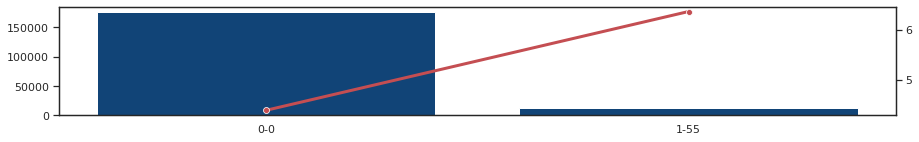

,INTERVALO,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0-0,176767,93.734324,7747,91.1519,4.382605
1,1-55,11816,6.265676,752,8.8481,6.364252


In [37]:
univar_original(TABLON_decil_03,'NUM_LLAMADAS_PROCESS',Exclude_CERO='TRUE')

    NUM_LLAMADAS_COMPETITION VS target
*   Tipo de variable: Numérica con menos de 10 categorías
*   LA CATEGORÍA NUM_LLAMADAS_COMPETITION = 0 ES EXCLUIDA


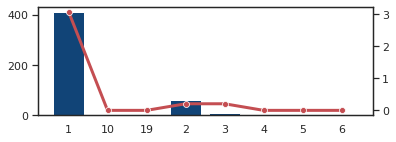

,NUM_LLAMADAS_COMPETITION,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,1,412,84.599589,15,88.235294,3.080082
1,2,60,12.320329,1,5.882353,0.205339
2,3,9,1.848049,1,5.882353,0.205339
3,4,2,0.410678,0,0.000000,0.000000
7,5,1,0.205339,0,0.000000,0.000000
6,6,1,0.205339,0,0.000000,0.000000
5,10,1,0.205339,0,0.000000,0.000000
4,19,1,0.205339,0,0.000000,0.000000


In [38]:
univar_original(TABLON_decil_03,'NUM_LLAMADAS_COMPETITION',Exclude_CERO='TRUE')

    NUM_LLAMADAS_WRONG_TARIFF VS target
*   Tipo de variable:  Numérica con MÁS de 10 categorías, su discretización es la siguiente


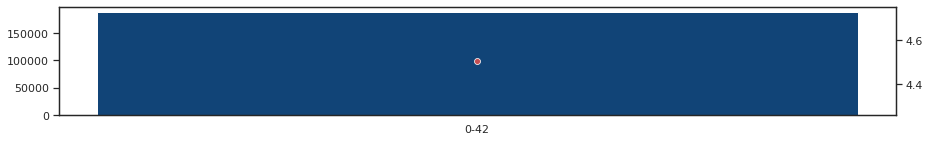

,INTERVALO,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0-42,188583,100.0,8499,100.0,4.506769


In [39]:
univar_original(TABLON_decil_03,'NUM_LLAMADAS_WRONG_TARIFF',Exclude_CERO='TRUE')

    NUM_LLAMADAS_HEAVY_CALLERS VS target
*   Tipo de variable:  Numérica con MÁS de 10 categorías, su discretización es la siguiente


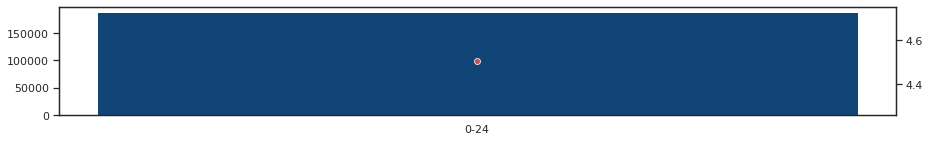

,INTERVALO,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0-24,188583,100.0,8499,100.0,4.506769


In [40]:
univar_original(TABLON_decil_03,'NUM_LLAMADAS_HEAVY_CALLERS',Exclude_CERO='TRUE')

    NUM_LLAMADAS_COMPETENCIA_OUT VS target
*   Tipo de variable:  Numérica con MÁS de 10 categorías, su discretización es la siguiente


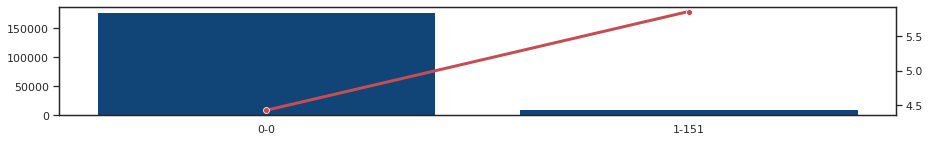

,INTERVALO,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0-0,177928,94.349968,7875,92.65796,4.425948
1,1-151,10655,5.650032,624,7.34204,5.856405


In [41]:
univar_original(TABLON_decil_03,'NUM_LLAMADAS_COMPETENCIA_OUT',Exclude_CERO='TRUE')

    MIN_LLAMADAS_COMPETENCIA_OUT VS target
*   Tipo de variable:  Numérica con MÁS de 10 categorías, su discretización es la siguiente


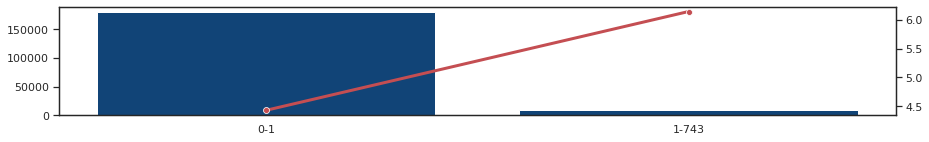

,INTERVALO,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0-1,180034,95.466718,7974,93.822803,4.429163
1,1-743,8549,4.533282,525,6.177197,6.141069


In [42]:
univar_original(TABLON_decil_03,'MIN_LLAMADAS_COMPETENCIA_OUT',Exclude_CERO='TRUE')

    MIN_LLAMADAS_COMPETENCIA_IN VS target
*   Tipo de variable:  Numérica con MÁS de 10 categorías, su discretización es la siguiente


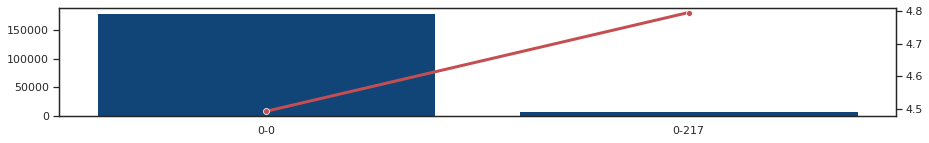

,INTERVALO,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0-0,179200,95.024472,8049,94.705259,4.491629
1,0-217,9383,4.975528,450,5.294741,4.795907


In [43]:
univar_original(TABLON_decil_03,'MIN_LLAMADAS_COMPETENCIA_IN',Exclude_CERO='TRUE')

    NUM_LLAMADAS_COMPETENCIA_IN VS target
*   Tipo de variable:  Numérica con MÁS de 10 categorías, su discretización es la siguiente


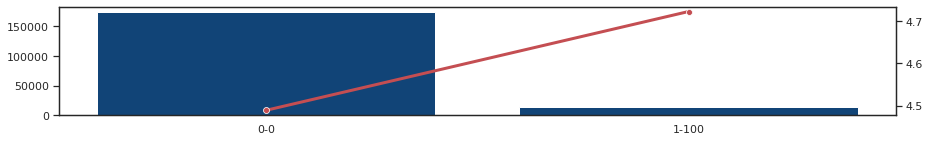

,INTERVALO,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0-0,174479,92.521065,7833,92.163784,4.489365
1,1-100,14104,7.478935,666,7.836216,4.722065


In [44]:
univar_original(TABLON_decil_03,'NUM_LLAMADAS_COMPETENCIA_IN',Exclude_CERO='TRUE')

In [64]:
TABLON_decil_03

,YEAR,MONTH,EOP,BRAND_DS,CUSTOMER_ID,MIN_SERV_ACTIVATION_DATE,MAX_SERV_DEACTIVATION_DATE,NUM_ACCS_TOTA,NUM_ACCS_ACTI,NUM_ACCS_DEAC,...,FACTURACION_MEDIA,FACTURACION_MEDIA_USO,INCR_PORCENTUAL_USO,VARIACION_ABSOLUTA_USO,SEG_ISSUE_CALLS,SEG_Calidad,SEG_Heavy_Callers,SEG_Wrong_Tariff,SEG_Competitors,SEGMENTO_CHURN_1P
0,2020,6,202006,YOIGO,3321604,2011-08-12,2020-03-20,9,0,0,...,28.310000,22.310000,-1.000000,-22.310000,0,1,0,0,1,2_TECHNICAL PROBLEMS
1,2020,6,202006,YOIGO,6445783,2014-12-18,2018-11-09,8,0,0,...,15.700000,15.700000,-1.000000,-15.700000,0,1,0,0,1,2_TECHNICAL PROBLEMS
2,2020,6,202006,YOIGO,1978359,2010-05-29,2016-12-20,8,1,0,...,NaN,NaN,99999.000000,NaN,0,1,0,0,1,2_TECHNICAL PROBLEMS
3,2020,6,202006,YOIGO,6452130,2014-12-20,2017-03-27,10,0,0,...,31.410000,26.450000,-1.000000,-26.450000,0,1,0,1,1,2_TECHNICAL PROBLEMS
4,2020,6,202006,YOIGO,461029,2008-04-30,2015-04-24,9,0,0,...,NaN,NaN,99999.000000,NaN,0,1,0,0,1,2_TECHNICAL PROBLEMS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62762,2020,6,202006,YOIGO,7167933,2016-01-07,2019-05-24,4,2,0,...,59.300000,45.903333,-1.000000,-45.903333,1,1,1,1,1,1_PROCESS ISSUE
62763,2020,6,202006,YOIGO,8961776,2019-11-01,2020-06-30,2,0,1,...,49.856667,51.510000,-0.629004,-32.400001,1,1,1,1,1,1_PROCESS ISSUE
62764,2020,6,202006,YOIGO,1748651,2010-02-18,2020-06-09,3,0,1,...,25.710000,21.710000,-0.916168,-19.890000,0,1,0,1,1,2_TECHNICAL PROBLEMS
62765,2020,6,202006,YOIGO,1604570,2010-01-04,2015-08-10,6,0,0,...,21.490000,21.490000,-0.507120,-10.898000,0,0,0,1,0,4_WRONG TARIFF


In [65]:
univar_original(TABLON_decil_03,'FIN_DTO',Exclude_CERO='TRUE',0)

SyntaxError: positional argument follows keyword argument (<ipython-input-65-68233d703d31>, line 1)

    INCR_PORCENTUAL_USO VS target
*   Tipo de variable:  Numérica con MÁS de 10 categorías, su discretización es la siguiente


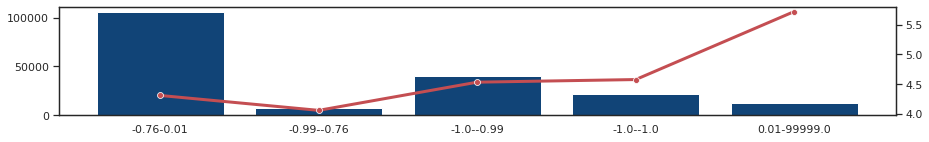

,INTERVALO,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,-1.0--1.0,106032,56.225641,4852,57.089069,4.575977
1,-1.0--0.99,7635,4.048615,346,4.071067,4.531762
2,-0.99--0.76,40534,21.493984,1644,19.343452,4.055854
3,-0.76-0.01,21962,11.645801,946,11.130721,4.307440
4,0.01-99999.0,12420,6.585959,711,8.365690,5.724638


In [26]:
univar_original(TABLON_decil_03,'INCR_PORCENTUAL_USO',Exclude_CERO='')

1.0

In [49]:
df_T=TABLON_decil_03[TABLON_decil_03['INCR_PORCENTUAL_USO']>0] 
df_T=df_T[df_T['INCR_PORCENTUAL_USO']<99999] 
df_T


df_T2=df_T[df_T['INCR_PORCENTUAL_USO']>1] 
df_T2=df_T2[df_T2['INCR_PORCENTUAL_USO']<65] 
df_T2


,YEAR,MONTH,EOP,BRAND_DS,CUSTOMER_ID,MIN_SERV_ACTIVATION_DATE,MAX_SERV_DEACTIVATION_DATE,NUM_ACCS_TOTA,NUM_ACCS_ACTI,NUM_ACCS_DEAC,...,FACTURACION_MEDIA,FACTURACION_MEDIA_USO,INCR_PORCENTUAL_USO,VARIACION_ABSOLUTA_USO,SEG_ISSUE_CALLS,SEG_Calidad,SEG_Heavy_Callers,SEG_Wrong_Tariff,SEG_Competitors,SEGMENTO_CHURN_1P
99,2020,6,202006,YOIGO,217518,2007-10-26,2018-03-28,7,0,0,...,7.190000,2.230000,1.021166,2.277200,0,1,0,1,1,2_TECHNICAL PROBLEMS
216,2020,6,202006,YOIGO,126857,2007-06-13,2018-01-16,8,0,0,...,20.693333,20.693333,1.425578,29.499968,0,1,0,1,1,2_TECHNICAL PROBLEMS
316,2020,6,202006,YOIGO,2699960,2011-02-03,2019-01-18,8,0,0,...,10.000000,10.000000,1.383560,13.835600,0,1,0,0,0,2_TECHNICAL PROBLEMS
1563,2020,6,202006,YOIGO,7245654,2016-02-17,NaN,0,0,0,...,27.533333,27.533333,1.122518,30.906667,0,1,0,1,1,2_TECHNICAL PROBLEMS
2450,2020,6,202006,YOIGO,6360701,2014-10-27,NaN,0,0,0,...,14.573333,10.720000,1.142929,12.252199,0,1,0,1,0,2_TECHNICAL PROBLEMS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60383,2020,6,202006,YOIGO,3559495,2011-11-02,2019-05-07,4,0,0,...,48.663333,34.583333,1.200034,41.501164,0,0,0,0,1,6_COMPETITORS
60397,2020,6,202006,YOIGO,7100123,2015-12-01,2018-11-20,2,0,0,...,23.173333,19.173333,4.727684,90.645468,0,1,0,1,1,2_TECHNICAL PROBLEMS
61466,2020,6,202006,YOIGO,346326,2008-01-16,2012-07-25,5,0,0,...,10.626667,10.626667,1.027475,10.918633,0,0,0,1,0,4_WRONG TARIFF
62327,2020,6,202006,YOIGO,925480,2009-02-11,2016-10-19,6,0,0,...,5.996667,1.036667,7.382637,7.653333,0,1,0,1,1,2_TECHNICAL PROBLEMS


    INCR_PORCENTUAL_USO VS target
*   Tipo de variable:  Numérica con MÁS de 10 categorías, su discretización es la siguiente


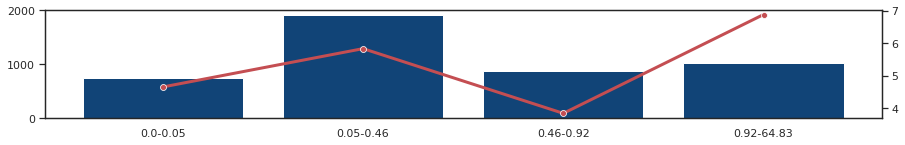

,INTERVALO,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,0.0-0.05,752,16.440752,35,13.944223,4.654255
1,0.05-0.46,1920,41.976388,112,44.621514,5.833333
2,0.46-0.92,885,19.348491,34,13.545817,3.841808
3,0.92-64.83,1017,22.234368,70,27.888446,6.882989


In [50]:
univar_original(df_T,'INCR_PORCENTUAL_USO',Exclude_CERO='',cli_hoja=500)

    INCR_PORCENTUAL_USO VS target
*   Tipo de variable:  Numérica con MÁS de 10 categorías, su discretización es la siguiente


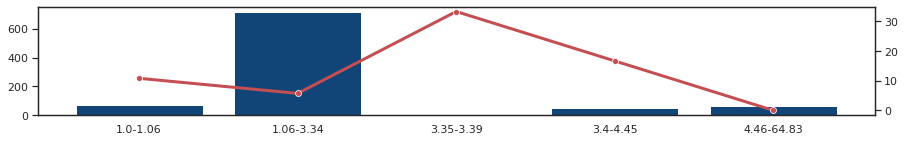

,INTERVALO,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,1.0-1.06,74,8.122942,8,13.333333,10.810811
1,1.06-3.34,717,78.704720,41,68.333333,5.718271
2,3.35-3.39,9,0.987925,3,5.000000,33.333333
3,3.4-4.45,48,5.268935,8,13.333333,16.666667
4,4.46-64.83,63,6.915477,0,0.000000,0.000000


In [60]:
univar_original(df_T2,'INCR_PORCENTUAL_USO',Exclude_CERO='',cli_hoja=5)

    VARIACION_ABSOLUTA_USO VS target
*   Tipo de variable:  Numérica con MÁS de 10 categorías, su discretización es la siguiente


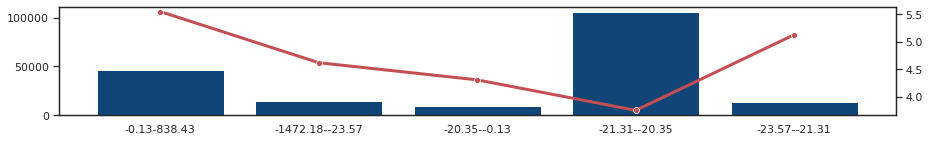

,INTERVALO,Total_Clientes,%_clientes,Total_Fugas,%_fugas,%_fugas_vs_Clie
0,-1472.18--23.57,45811,24.292221,2116,24.897047,4.618978
1,-23.57--21.31,14161,7.509160,726,8.542181,5.126757
2,-21.31--20.35,9214,4.885912,346,4.071067,3.755155
3,-20.35--0.13,105874,56.141858,4561,53.665137,4.307951
4,-0.13-838.43,13523,7.170848,750,8.824568,5.546107


In [27]:
univar_original(TABLON_decil_03,'VARIACION_ABSOLUTA_USO',Exclude_CERO='')


In [21]:
verificar(TABLON_decil_03,'dto')

['FIN_DTO']

In [ ]:
TABLON_decil_03['FACTURACION_MEDIA_USO']=TABLON_decil_03[]+


TABLON_decil_03[]+
TABLON_decil_03[]+
TABLON_decil_03[]+
TABLON_decil_03[]+
TABLON_decil_03[]+

In [ ]:
#MIRAR PARA WRING TAR 
from (
SELECT CUSTOMER_ID, AVG(ROUNd(Fact_Total_Wotax,2)) AS FACTURACION_MEDIA, COUNT(DISTINCT EOP) AS MESES,
AVG(ROUND(ifnull(Fact_BONO_discount,0)+
ifnull(Fact_LOYALTY_discount,0)+
ifnull(Fact_other,0)+
ifnull(Fact_QUOTA,0)+
ifnull(Fact_QUOTA_discount,0)+
ifnull(Fact_USAGE,0)+
ifnull(Fact_XSELL_DISCOUNT,0),2)) AS FACTURACION_MEDIA_USO

fROM `bi-data-science-pilots.MASDATA.brand_yoigo_monthly_board_2020*`
WHERE EOP IN (MONTH_ID_ST_M1,MONTH_ID_ST_M2,MONTH_ID_ST_M3) and Fact_Total_Wotax is not null
GROUP BY CUSTOMER_ID

In [460]:
verificar(TABLON_decil_03,"Fact")

['Fact_BONO',
 'Fact_BONO_discount',
 'Fact_LOYALTY_discount',
 'Fact_other',
 'Fact_PAYTERM',
 'Fact_PENALTY',
 'Fact_QUOTA',
 'Fact_QUOTA_discount',
 'Fact_USAGE',
 'Fact_XSELL_DISCOUNT',
 'Fact_Total_Wotax',
 'Fact_Total_tax',
 'MAX_DATE_FACT',
 'MAX_NUM_FACTURA_IMPAGADA']

In [ ]:
# ejecución de variables de interés
## ! jira_averia_masiva
## AVG_DL_PEAK_THR_BPS_MOBI
## AVG_KPI_PERC_CDR_MOBI
## MOBILE_INCIDENCES
## ! VARIACION_ABSOLUTA_USO,  MIRAR CREACION
## ! INCR_PORCENTUAL_USO MIRAR CREACION IDEN ARRIBA
## BILLING_CLAIMS
## CLAIMS
## mirar! ISSUE_CALLS
## mirar! MIN_WAIT en su lugar (NUM_TOTA_WAIT_MORE_5MIN , IVR_NUM_TOTA_WAIT_MORE_5MIN)
## NUM_RECA
## mirar! FIN_DTO
# mirar! --> NUM_LLAMADAS_ATC
## NUM_LLAMADAS_PROCESS
## NUM_LLAMADAS_HEAVY_CALLERS
## NUM_LLAMADAS_WRONG_TARIFF
## NUM_LLAMADAS_CALIDAD_RED --> IS_DETERIORED_1M_AVG_KPI_QOE_MOBI
## mirar!  NUM_LLAMADAS_COMPETITORS --> MIRAR 
## TOTAL_BLUE_TICKETS
## TICKETS_NETWORK
## TICKETS_WRONG_TARIFF --> NUM_LLAMADAS_WRONG_TARIFF
## AVG_THR_QOE_MOBI
## LINEAS_CON_CONSUMO_PDTE --> 
## LINEAS_EXCESO
#LINEAS_CON_BONO_SIN_USO
#IS_CHURN_GMM
##! cust_n_fix_mob   
    
    